# Assignment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Loading dataframe, initial insights and data cleaning

## Loading the dataframe

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Initial insights

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Multiple columns with a large number of missing values found

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Findings on describe
 - Id is the key for each records and can be dropped as it wont contribute to the analysis

## Data cleaning

### Removing the Id

In [6]:
df.drop(columns=['Id'], inplace=True)
df.shape

(1460, 80)

### Dropping columns with high percentage of missing values

In [7]:
col_null_percentage = df.isnull().sum()/df.shape[0]
col_null_percentage.sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
MSSubClass       0.000000
Length: 80, dtype: float64

In [8]:
# PoolQC, MiscFeature, Alley, Fence have more than 80% null values. 
# So they should be dropped as they wont contribute much and imputing would introduce bias
df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)
df.shape

(1460, 76)

In [9]:
col_null_percentage = df.isnull().sum()/df.shape[0]
col_null_percentage.sort_values(ascending=False)

FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
                   ...   
CentralAir       0.000000
HeatingQC        0.000000
SaleCondition    0.000000
TotalBsmtSF      0.000000
MSSubClass       0.000000
Length: 76, dtype: float64

### Find categorical columns and impute the missing values

In [10]:
categorical_df = df.select_dtypes(include='object')
categorical_cols = categorical_df.columns
len(categorical_cols)

39

In [11]:
categorical_col_null_percentage = categorical_df.isnull().sum()/categorical_df.shape[0]
categorical_col_null_percentage = categorical_col_null_percentage.sort_values(ascending=False)
categorical_col_null_percentage[categorical_col_null_percentage > 0]

FireplaceQu     0.472603
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
BsmtCond        0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

#### Imputing FireplaceQu missing values

In [12]:
fireplace_value_counts = df.FireplaceQu.value_counts()
print(fireplace_value_counts)
print("Number of missing values:", len(df.FireplaceQu) - fireplace_value_counts.sum())
print("Number of houses with no fireplaces:", (df.Fireplaces == 0).sum())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Number of missing values: 690
Number of houses with no fireplaces: 690


In [13]:
# So the FireplaceQu has null values wherever the houses have no fire place. 
# So lets impute with Nofireplace as a level in the categorical variable
df.FireplaceQu.fillna('Nofireplace', inplace=True)

#### Imputing Garage related missing values as they seem to have same percentage

In [14]:
# Lets confirm if its the case that rows with NA for GarageType has all the null values for the corresponding rows
garage_vars = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df.loc[df['GarageType'].isnull(), garage_vars].isnull().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [15]:
# Lets impute the missing values with NoGarage for all the columns related to garage
df[garage_vars] = df[garage_vars].fillna('NoGarage')

#### Imputing Basement related missing values as they seem to have same percentages

In [16]:
# Lets confirm if its the case that rows with NA for GarageType has all the null values for the corresponding rows
basement_vars = ['BsmtExposure', 'BsmtFinType2']
df.loc[df['BsmtExposure'].isnull(), basement_vars].isnull().sum()

BsmtExposure    38
BsmtFinType2    37
dtype: int64

In [17]:
# Its not the case so lets impute them indiviually with NoBsmt
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBsmt')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBsmt')

In [18]:
# Lets confirm if its the case that rows with NA for GarageType has all the null values for the corresponding rows
basement_vars_2nd_set = ['BsmtQual', 'BsmtFinType1', 'BsmtCond']
df.loc[df['BsmtQual'].isnull(), basement_vars_2nd_set].isnull().sum()

BsmtQual        37
BsmtFinType1    37
BsmtCond        37
dtype: int64

In [19]:
# Lets impute the missing values with NoBsmt for all the columns in basement_vars_2nd_set
df[basement_vars_2nd_set] = df[basement_vars_2nd_set].fillna('NoBsmt')

#### Imputing MasVnrType

In [20]:
print(df['MasVnrType'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [21]:
# Impute with mode
mode_MasVnrType = df['MasVnrType'].mode()[0]
df['MasVnrType'] = df['MasVnrType'].fillna(mode_MasVnrType)

#### Imputing Electrical

In [22]:
print(df['Electrical'].value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [23]:
# Impute with mode
mode_Electrical = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(mode_Electrical)

#### Recheck null values

In [24]:
col_null_percentage = df.isnull().sum()/df.shape[0]
col_null_percentage = col_null_percentage.sort_values(ascending=False)
col_null_percentage[col_null_percentage > 0]

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64

#### Impute missing values for LotFrontage

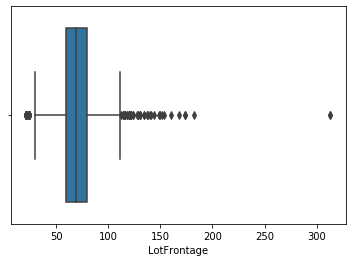

In [25]:
sns.boxplot(df.LotFrontage)
plt.show()

(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <a list of 10 Patch objects>)

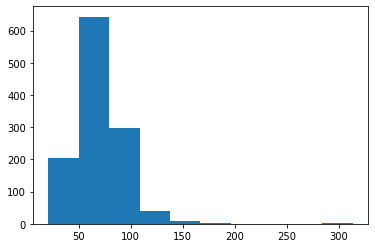

In [26]:
plt.hist(df.LotFrontage)

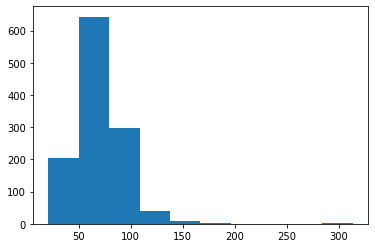

In [27]:
plt.hist(df.LotFrontage)
plt.show()

In [28]:
# Fill na values with the median
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

#### Impute missing values for GarageYrBlt

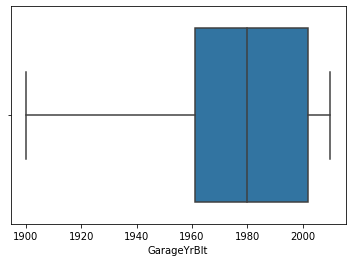

In [29]:
sns.boxplot(df.GarageYrBlt)
plt.show()

In [30]:
df.GarageYrBlt.dtype

dtype('float64')

In [31]:
# Again these records correspond to houses with no garage, so lets set it to 
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

#### Impute missing values for MasVnrArea

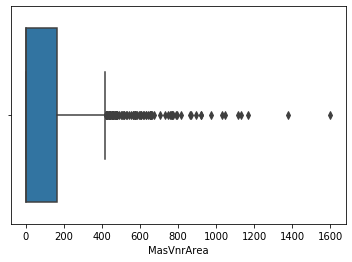

In [32]:
sns.boxplot(df.MasVnrArea)
plt.show()

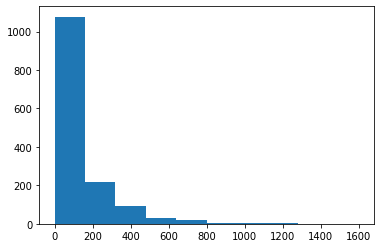

In [33]:
plt.hist(df.MasVnrArea)
plt.show()

In [34]:
# Impute with median
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())

In [35]:
df.isnull().sum().sum()

0

### Drop highly skewed categorical columns if any

In [36]:
categorical_cols = df.select_dtypes(include='object').columns
print(list(categorical_cols))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [37]:
# Find skewed categorical cols
skewed_categorical_cols = []

for categorical_col in categorical_cols:
    category_proportions = df[categorical_col].value_counts()/df.shape[0]
    if (category_proportions > 0.80).sum() > 0:
        skewed_categorical_cols.append(categorical_col)
        
print(skewed_categorical_cols)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [38]:
df.drop(columns=skewed_categorical_cols, inplace=True)

In [39]:
df.shape

(1460, 56)

## Data preparation

### Check target variable distribution

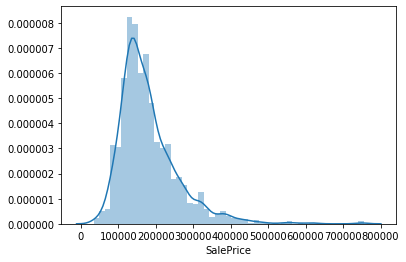

In [40]:
sns.distplot(df.SalePrice)
plt.show()

In [41]:
# The target variable is skewed and has large values, so will need log scale
df['LogSalePrice'] = np.log(df.SalePrice)
prep_df = df.drop(columns=['SalePrice'])
df = "abc"

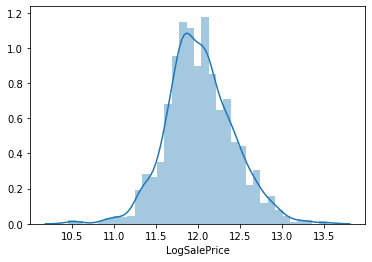

In [42]:
sns.distplot(prep_df.LogSalePrice)
plt.show()

### Prepare categorical variables

In [43]:
categorical_cols = prep_df.select_dtypes(include='object').columns
print(list(categorical_cols))

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']


In [44]:
# Get an insight of nominal and ordinal categorical vars
for categorical_col in categorical_cols:
    print(categorical_col, ":", prep_df[categorical_col].unique())
    print("--------------------------------------------------")
    
nominal_cols = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 
                'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                'BsmtExposure']

ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageType', 'GarageFinish']

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
--------------------------------------------------
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
--------------------------------------------------
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
--------------------------------------------------
Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'

In [45]:
nominal_cols = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 
                'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                'BsmtExposure', 'GarageType']

ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageFinish']

### Treat nominal categorical columns with clubbing together categories with low occurences

In [46]:
def categorical_var_proportion(cat_var):
    return round((100 * prep_df[cat_var].value_counts() / prep_df.shape[0]), 2)

In [47]:
for cat_var in nominal_cols:
    print(categorical_var_proportion(cat_var))

RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
SWISU       1.71
StoneBr     1.71
MeadowV     1.16
Blmngtn     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Neighborhood, dtype: float64
1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64
Gable      78.15
Hip        19.59
Flat        0.89
Gambrel     

In [48]:
# Clubbing categoies with low occurences
def club_categories(cat_var, cutoff):
    cat_porportions = categorical_var_proportion(cat_var)
    club_categories = list(cat_porportions[cat_porportions < cutoff].index)
    prep_df[cat_var] = prep_df[cat_var].apply(lambda x: 'Other' if x in club_categories else x)

In [49]:
# Clubbing categories with low occurences in Neighborhood, HouseStyle, 
# RoofStyle, Exterior1st, Exterior2nd, Foundation, GarageType
club_categories('Neighborhood', 2.0)
club_categories('HouseStyle', 3.0)
club_categories('RoofStyle', 1.0)
club_categories('Exterior1st', 2.0)
club_categories('Exterior2nd', 2.0)
club_categories('Foundation', 2.0)
club_categories('GarageType', 2.0)

### Replace ordinal columns with numerical values
ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageFinish']

#### ExterQual

In [50]:
list(prep_df.ExterQual.unique())

['Gd', 'TA', 'Ex', 'Fa']

In [51]:
# Ex: Excellent
# Gd: Good
# TA: Average/Typical
# Fa: Fair
# Po: Poor
prep_df['ExterQual'] = prep_df.ExterQual.map({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

#### BsmtQual

In [52]:
list(prep_df.BsmtQual.unique())

['Gd', 'TA', 'Ex', 'NoBsmt', 'Fa']

In [53]:
prep_df['BsmtQual'] = prep_df.BsmtQual.map({'NoBsmt': -1, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

#### BsmtFinType1

In [54]:
list(prep_df.BsmtFinType1.unique())

['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NoBsmt', 'LwQ']

In [55]:
# GLQ	Good Living Quarters
# ALQ	Average Living Quarters
# BLQ	Below Average Living Quarters	
# Rec	Average Rec Room
# LwQ	Low Quality
# Unf	Unfinshed
# NA	No Basement
prep_df['BsmtFinType1'] = prep_df.BsmtFinType1.map({'GLQ': 6, 'ALQ': 5, 'Unf': 1, 'Rec': 3, 'BLQ': 4, 'NoBsmt': -1, 'LwQ': 2})

#### HeatingQC

In [56]:
list(prep_df.HeatingQC.unique())

['Ex', 'Gd', 'TA', 'Fa', 'Po']

In [57]:
prep_df['HeatingQC'] = prep_df.HeatingQC.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

#### KitchenQual

In [58]:
list(prep_df.KitchenQual.unique())

['Gd', 'TA', 'Ex', 'Fa']

In [59]:
prep_df['KitchenQual'] = prep_df.KitchenQual.map({'Gd':3, 'TA': 2, 'Ex': 4, 'Fa': 1})

#### FireplaceQu

In [60]:
list(prep_df.FireplaceQu.unique())

['Nofireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po']

In [61]:
prep_df['FireplaceQu'] = prep_df.FireplaceQu.map({'Nofireplace': -1, 'TA': 3, 'Gd': 4, 'Fa': 2, 'Ex': 5, 'Po': 1}) 

#### GarageFinish

In [62]:
list(prep_df.GarageFinish.unique())

['RFn', 'Unf', 'Fin', 'NoGarage']

In [63]:
# Fin	Finished
# RFn	Rough Finished	
# Unf	Unfinished
# NA	No Garage
prep_df['GarageFinish'] = prep_df.GarageFinish.map({'RFn': 2, 'Unf': 1, 'Fin': 3, 'NoGarage': -1})

### Create dummy variables for the nominal types
nominal_cols = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 
                'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                'BsmtExposure', 'GarageType']

In [64]:
prep_df.shape

(1460, 56)

In [65]:
def create_dummies(cat_var, prefix):
    global prep_df
    dummy_vars = pd.get_dummies(prep_df[cat_var], drop_first=True, prefix=prefix)
    prep_df = pd.concat([prep_df, dummy_vars], axis=1)
    prep_df = prep_df.drop(columns=[cat_var])

#### MSZoning

In [66]:
prep_df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [67]:
create_dummies('MSZoning', 'MSZoning_')

#### LotShape

In [68]:
prep_df.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [69]:
create_dummies('LotShape', 'LotShape_')

#### LotConfig

In [70]:
prep_df.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [71]:
create_dummies('LotConfig', 'LotConfig_')

#### Neighborhood

In [72]:
prep_df.Neighborhood.unique()

array(['CollgCr', 'Other', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'Edwards', 'Timber', 'Gilbert'], dtype=object)

In [73]:
create_dummies('Neighborhood', 'Neighborhood_')

#### HouseStyle

In [74]:
prep_df.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', 'Other', 'SLvl'], dtype=object)

In [75]:
create_dummies('HouseStyle', 'HouseStyle_')

#### RoofStyle

In [76]:
prep_df.RoofStyle.unique()

array(['Gable', 'Hip', 'Other'], dtype=object)

In [77]:
create_dummies('RoofStyle', 'RoofStyle_')

#### Exterior1st

In [78]:
prep_df.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'Other',
       'CemntBd', 'Plywood'], dtype=object)

In [79]:
create_dummies('Exterior1st', 'Exterior1st_')

#### Exterior2nd

In [80]:
prep_df.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'Other'], dtype=object)

In [81]:
create_dummies('Exterior2nd', 'Exterior2nd_')

#### MasVnrType

In [82]:
prep_df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [83]:
create_dummies('MasVnrType', 'MasVnrType_')

#### Foundation

In [84]:
prep_df.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Other'], dtype=object)

In [85]:
create_dummies('Foundation', 'Foundation_')

#### BsmtExposure

In [86]:
prep_df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'NoBsmt'], dtype=object)

In [87]:
create_dummies('BsmtExposure', 'BsmtExposure_')

#### GarageType

In [88]:
prep_df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Other', 'NoGarage'], dtype=object)

In [89]:
create_dummies('GarageType', 'GarageType_')

In [90]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 105 entries, MSSubClass to GarageType__Other
dtypes: float64(4), int64(40), uint8(61)
memory usage: 589.0 KB


We now have all the variables as numerics

In [91]:
prep_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,Foundation__Other,Foundation__PConc,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,BsmtExposure__NoBsmt,GarageType__BuiltIn,GarageType__Detchd,GarageType__NoGarage,GarageType__Other
0,60,65.0,8450,7,5,2003,2003,196.0,3,3,...,0,1,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,2,3,...,0,0,1,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,3,3,...,0,1,0,1,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,2,2,...,0,0,0,0,1,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,3,3,...,0,1,0,0,0,0,0,0,0,0


### Remove YearRemodAdd as it wont contribute to analysis

In [92]:
prep_df = prep_df.drop(columns=['YearRemodAdd'])

### Conver YearBuilt to Age and drop YearBuilt

In [93]:
prep_df['Age'] = prep_df.YearBuilt.apply(lambda x: 2020 - x)
prep_df = prep_df.drop(columns=['YearBuilt'])

### Check for higly correlated vars and drop them

In [94]:
# Get absolute values as we can then check for a threshold
corr_matrix = prep_df.corr().abs()
# Get the upper triangle as we can only parse that
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# We check for all columns and see if for that column any value is larger than 0.80
# If it has any value greater ahan 0.80 we can drop that columns
drop_columns = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
drop_columns

['1stFlrSF',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageArea',
 'LogSalePrice',
 'MSZoning__RM',
 'Neighborhood__Somerst',
 'HouseStyle__2Story',
 'Exterior2nd__HdBoard',
 'Exterior2nd__MetalSd',
 'Exterior2nd__VinylSd',
 'Exterior2nd__Wd Sdng',
 'MasVnrType__None',
 'GarageType__NoGarage']

In [95]:
# drop_columns contains LogSalePrice but its the target variable.
drop_columns.remove('LogSalePrice')
# drop all other variables with high collinearity
prep_df = prep_df.drop(columns=drop_columns)
prep_df.shape

(1460, 91)

## Split the dataset into train and test

In [96]:
df_train, df_test = train_test_split(prep_df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 91)
(439, 91)


## Perform scaling

In [97]:
minmaxscaler = MinMaxScaler()
df_train[:] = minmaxscaler.fit_transform(df_train[:])
df_test[:] = minmaxscaler.transform(df_test[:])

In [98]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,...,Foundation__Other,Foundation__PConc,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__No,BsmtExposure__NoBsmt,GarageType__BuiltIn,GarageType__Detchd,GarageType__Other,Age
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226306,0.166332,0.042162,0.565894,0.572600,0.065306,0.466536,0.695984,0.652162,0.079406,...,0.022527,0.452498,0.098923,0.081293,0.633692,0.029383,0.063663,0.269344,0.021548,0.280281
std,0.254701,0.075653,0.048221,0.155515,0.136515,0.117088,0.190447,0.180070,0.309866,0.082409,...,0.148462,0.497982,0.298704,0.273418,0.482031,0.168960,0.244271,0.443836,0.145272,0.219718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.027937,0.444444,0.500000,0.000000,0.333333,0.600000,0.285714,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072464
50%,0.176471,0.164384,0.037555,0.555556,0.500000,0.000000,0.333333,0.800000,0.714286,0.069454,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.268116
75%,0.294118,0.195205,0.046943,0.666667,0.625000,0.098750,0.666667,0.800000,1.000000,0.126152,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.405797
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Seperate out X and y

In [99]:
y_train = df_train.pop('LogSalePrice')
X_train = df_train

y_test = df_test.pop('LogSalePrice')
X_test = df_test

## Perform coarse feature selection by using rfe

In [100]:
# Pick a model
lr = LinearRegression()

# Create rfe
rfe = RFE(lr, n_features_to_select=50)

# Fit on train
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=50)

### Check r-squared for train and test

In [101]:
y_train_pred = rfe.predict(X_train)
rfe_train_r2 = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = rfe.predict(X_test)
rfe_test_r2 = round(r2_score(y_test, y_test_pred), 2)

print("RFE train r2:", rfe_train_r2)
print("RFE test r2:", rfe_test_r2)

RFE train r2: 0.89
RFE test r2: 0.88


r2 look good for train and test

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 10),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 13),
 ('ExterQual', False, 41),
 ('BsmtQual', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 7),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 11),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 17),
 ('FullBath', True, 1),
 ('HalfBath', False, 14),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 16),
 ('KitchenQual', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 12),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 20),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 25),
 ('MoSold', False, 35),
 ('YrSold', False, 21),
 ('MSZoning__FV'

In [103]:
rfe_supported_columns = list(X_train.columns[rfe.support_])
rfe_supported_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning__FV',
 'MSZoning__RH',
 'MSZoning__RL',
 'LotShape__IR3',
 'Neighborhood__CollgCr',
 'Neighborhood__Crawfor',
 'Neighborhood__Edwards',
 'Neighborhood__Gilbert',
 'Neighborhood__IDOTRR',
 'Neighborhood__Mitchel',
 'Neighborhood__NAmes',
 'Neighborhood__NWAmes',
 'Neighborhood__OldTown',
 'Neighborhood__Other',
 'Neighborhood__Sawyer',
 'Neighborhood__SawyerW',
 'Neighborhood__Timber',
 'Exterior1st__CemntBd',
 'Exterior1st__HdBoard',
 'Exterior1st__MetalSd',
 'Exterior1st__Other',
 'Exterior1st__Plywood',
 'Exterior1st__VinylSd',
 'Exterior1st__Wd Sdng',
 'BsmtExposure__Gd',
 'GarageType__Other',
 'Age']

### Drop unselected features

In [104]:
X_train = X_train[rfe_supported_columns]
X_test = X_test[rfe_supported_columns]

print(X_train.shape)
print(X_test.shape)

(1021, 50)
(439, 50)


## Manual feature elimination

In [105]:
supported_cols = rfe_supported_columns

Given a list of features to include in the model, a linear regression model is created from the training dataset.

In [106]:
def lr_model_train(support_cols):
    # Get the rfe supported columns filtered
    X_train_supportcols = X_train[support_cols]

    # Add constant for stats model preparation
    X_train_supportcols_sm = sm.add_constant(X_train_supportcols)

    # Select a cost function
    costfunc = sm.OLS(y_train, X_train_supportcols_sm)

    # Fit the model
    lr_model = costfunc.fit()
    
    return lr_model

Given a list of features to include in the model, a linear regression model is created from the training dataset, and a summary of the learned model is returned.

In [107]:
def lr_model_train_summarize(support_cols):
    lr_model = lr_model_train(support_cols)

    # Summary
    return lr_model.summary()

Eliminates the given variable from the `supported_cols` and then trains and summarizes a linear regression model.

In [108]:
def eliminate_train_summarize(var):
    supported_cols.remove(var)
    return lr_model_train_summarize(supported_cols)

Prepares a sorted VIF table with descending VIF values for the features in the `supported_cols`

In [109]:
def prepare_VIF_table_supportedcols():
    vif = pd.DataFrame()

    vif["Features"] = supported_cols
    X_train_supcols = X_train[supported_cols]
    vif["VIF"] = [variance_inflation_factor(X_train_supcols.values, i) for i in range(X_train_supcols.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

Given a feature, it is reinstated into the `supported_cols` and a linear regression model is trained and summarized.

In [110]:
def reinstate_train_summarize(var):
    supported_cols.append(var)
    return lr_model_train_summarize(supported_cols)

In [111]:
lr_model_train_summarize(rfe_supported_columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     165.2
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:44   Log-Likelihood:                 1792.7
No. Observations:                1021   AIC:                            -3483.
Df Residuals:                     970   BIC:                            -3232.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1478      0.018      8.000      0.000       0.112       0.184
MSSubClass               -0.0363      0.007     -5.257      0.000      -0.050      -0.023
LotArea                   0.1341      0.034      3.901      0.000       0.067       0.202
OverallQual               0.1821      0.017     10.839      0.000       0.149       0.215
OverallCond               0.1171      0.012      9.883      0.000       0.094       0.140
BsmtQual                  0.0467      0.013      3.458      0.001       0.020       0.073
BsmtFinType1              0.0251      0.007      3.551      0.000       0.011       0.039
BsmtFinSF1               -0.0321      0.050     -0.639      0.523      -0.131       0.067
BsmtUnfSF                -0.0016      0.021     -0.076      0.940      -0.043       0.040
TotalBsmtSF              -0.0267      0.065     -0.410      0.682      -0.155       0.101
2ndFlrSF                 -0.0385      0.016     -2.367      0.018      -0.070      -0.007
GrLivArea                 0.4411      0.041     10.780      0.000       0.361       0.521
BsmtFullBath              0.0567      0.011      5.141      0.000       0.035       0.078
FullBath                  0.0215      0.012      1.844      0.066      -0.001       0.044
BedroomAbvGr              0.0492      0.018      2.664      0.008       0.013       0.085
KitchenQual               0.0363      0.009      3.860      0.000       0.018       0.055
Fireplaces                0.0315      0.008      3.841      0.000       0.015       0.048
GarageFinish              0.0216      0.008      2.711      0.007       0.006       0.037
GarageCars                0.0715      0.011      6.543      0.000       0.050       0.093
WoodDeckSF                0.0309      0.011      2.925      0.004       0.010       0.052
EnclosedPorch             0.0264      0.014      1.952      0.051      -0.000       0.053
3SsnPorch                 0.0480      0.022      2.216      0.027       0.005       0.090
ScreenPorch               0.0325      0.010      3.128      0.002       0.012       0.053
PoolArea                 -0.1067      0.028     -3.850      0.000      -0.161      -0.052
MSZoning__FV              0.0310      0.009      3.380      0.001       0.013       0.049
MSZoning__RH              0.0344      0.014      2.544      0.011       0.008       0.061
MSZoning__RL              0.0362      0.006      6.216      0.000       0.025       0.048
LotShape__IR3            -0.0446      0.016     -2.798      0.005      -0.076      -0.013
Neighborhood__CollgCr    -0.0298      0.006     -4.917      0.000      -0.042      -0.018
Neighborhood__Crawfor     0.0185      0.009      2.028      0.043       0.001       0.036
Neighborhood__Edwards    -0.0511      0.007     -7.323      0.000      -0.065      -0.037
Neighborhood__Gilbert  

BsmtUnfSF has high p-val of 0.940

In [112]:
eliminate_train_summarize('BsmtUnfSF')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     168.7
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1792.7
No. Observations:                1021   AIC:                            -3485.
Df Residuals:                     971   BIC:                            -3239.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1479      0.018      8.027      0.000       0.112       0.184
MSSubClass               -0.0363      0.007     -5.266      0.000      -0.050      -0.023
LotArea                   0.1342      0.034      3.910      0.000       0.067       0.202
OverallQual               0.1820      0.017     10.854      0.000       0.149       0.215
OverallCond               0.1172      0.012      9.911      0.000       0.094       0.140
BsmtQual                  0.0466      0.013      3.462      0.001       0.020       0.073
BsmtFinType1              0.0251      0.007      3.576      0.000       0.011       0.039
BsmtFinSF1               -0.0290      0.030     -0.975      0.330      -0.088       0.029
TotalBsmtSF              -0.0304      0.044     -0.690      0.490      -0.117       0.056
2ndFlrSF                 -0.0385      0.016     -2.367      0.018      -0.070      -0.007
GrLivArea                 0.4412      0.041     10.787      0.000       0.361       0.521
BsmtFullBath              0.0569      0.011      5.323      0.000       0.036       0.078
FullBath                  0.0214      0.012      1.844      0.065      -0.001       0.044
BedroomAbvGr              0.0491      0.018      2.666      0.008       0.013       0.085
KitchenQual               0.0363      0.009      3.861      0.000       0.018       0.055
Fireplaces                0.0315      0.008      3.842      0.000       0.015       0.048
GarageFinish              0.0217      0.008      2.720      0.007       0.006       0.037
GarageCars                0.0715      0.011      6.551      0.000       0.050       0.093
WoodDeckSF                0.0309      0.011      2.937      0.003       0.010       0.052
EnclosedPorch             0.0264      0.013      1.957      0.051   -7.66e-05       0.053
3SsnPorch                 0.0479      0.022      2.216      0.027       0.005       0.090
ScreenPorch               0.0326      0.010      3.153      0.002       0.012       0.053
PoolArea                 -0.1066      0.028     -3.854      0.000      -0.161      -0.052
MSZoning__FV              0.0310      0.009      3.383      0.001       0.013       0.049
MSZoning__RH              0.0343      0.014      2.544      0.011       0.008       0.061
MSZoning__RL              0.0362      0.006      6.219      0.000       0.025       0.048
LotShape__IR3            -0.0446      0.016     -2.799      0.005      -0.076      -0.013
Neighborhood__CollgCr    -0.0298      0.006     -4.920      0.000      -0.042      -0.018
Neighborhood__Crawfor     0.0185      0.009      2.033      0.042       0.001       0.036
Neighborhood__Edwards    -0.0511      0.007     -7.326      0.000      -0.065      -0.037
Neighborhood__Gilbert    -0.0344      0.008     -4.277      0.000      -0.050      -0.019
Neighborhood__IDOTRR   

TotalBsmtSF has high p-val of 0.49. Lets drop it

In [113]:
eliminate_train_summarize('TotalBsmtSF')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1792.4
No. Observations:                1021   AIC:                            -3487.
Df Residuals:                     972   BIC:                            -3245.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1486      0.018      8.080      0.000       0.112       0.185
MSSubClass               -0.0358      0.007     -5.222      0.000      -0.049      -0.022
LotArea                   0.1321      0.034      3.866      0.000       0.065       0.199
OverallQual               0.1815      0.017     10.835      0.000       0.149       0.214
OverallCond               0.1179      0.012     10.012      0.000       0.095       0.141
BsmtQual                  0.0418      0.011      3.634      0.000       0.019       0.064
BsmtFinType1              0.0252      0.007      3.583      0.000       0.011       0.039
BsmtFinSF1               -0.0329      0.029     -1.126      0.260      -0.090       0.024
2ndFlrSF                 -0.0305      0.011     -2.662      0.008      -0.053      -0.008
GrLivArea                 0.4234      0.032     13.331      0.000       0.361       0.486
BsmtFullBath              0.0571      0.011      5.347      0.000       0.036       0.078
FullBath                  0.0218      0.012      1.877      0.061      -0.001       0.045
BedroomAbvGr              0.0480      0.018      2.616      0.009       0.012       0.084
KitchenQual               0.0364      0.009      3.870      0.000       0.018       0.055
Fireplaces                0.0316      0.008      3.862      0.000       0.016       0.048
GarageFinish              0.0218      0.008      2.737      0.006       0.006       0.037
GarageCars                0.0715      0.011      6.557      0.000       0.050       0.093
WoodDeckSF                0.0313      0.011      2.974      0.003       0.011       0.052
EnclosedPorch             0.0262      0.013      1.941      0.053      -0.000       0.053
3SsnPorch                 0.0478      0.022      2.212      0.027       0.005       0.090
ScreenPorch               0.0326      0.010      3.158      0.002       0.012       0.053
PoolArea                 -0.1084      0.028     -3.935      0.000      -0.162      -0.054
MSZoning__FV              0.0312      0.009      3.409      0.001       0.013       0.049
MSZoning__RH              0.0345      0.013      2.559      0.011       0.008       0.061
MSZoning__RL              0.0362      0.006      6.214      0.000       0.025       0.048
LotShape__IR3            -0.0454      0.016     -2.854      0.004      -0.077      -0.014
Neighborhood__CollgCr    -0.0296      0.006     -4.890      0.000      -0.041      -0.018
Neighborhood__Crawfor     0.0189      0.009      2.083      0.038       0.001       0.037
Neighborhood__Edwards    -0.0510      0.007     -7.321      0.000      -0.065      -0.037
Neighborhood__Gilbert    -0.0338      0.008     -4.228      0.000      -0.050      -0.018
Neighborhood__IDOTRR     -0.0362      0.011     -3.424      0.001      -0.057      -0.015
Neighborhood__Mitchel  

BsmtFinSF1 has a high p-val of 0.260. Lets eliminate it

In [114]:
eliminate_train_summarize('BsmtFinSF1')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1791.8
No. Observations:                1021   AIC:                            -3488.
Df Residuals:                     973   BIC:                            -3251.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1491      0.018      8.110      0.000       0.113       0.185
MSSubClass               -0.0356      0.007     -5.200      0.000      -0.049      -0.022
LotArea                   0.1322      0.034      3.867      0.000       0.065       0.199
OverallQual               0.1820      0.017     10.872      0.000       0.149       0.215
OverallCond               0.1178      0.012     10.005      0.000       0.095       0.141
BsmtQual                  0.0422      0.011      3.677      0.000       0.020       0.065
BsmtFinType1              0.0212      0.006      3.488      0.001       0.009       0.033
2ndFlrSF                 -0.0279      0.011     -2.484      0.013      -0.050      -0.006
GrLivArea                 0.4131      0.030     13.581      0.000       0.353       0.473
BsmtFullBath              0.0529      0.010      5.288      0.000       0.033       0.073
FullBath                  0.0225      0.012      1.940      0.053      -0.000       0.045
BedroomAbvGr              0.0495      0.018      2.710      0.007       0.014       0.085
KitchenQual               0.0370      0.009      3.941      0.000       0.019       0.055
Fireplaces                0.0312      0.008      3.810      0.000       0.015       0.047
GarageFinish              0.0211      0.008      2.660      0.008       0.006       0.037
GarageCars                0.0720      0.011      6.599      0.000       0.051       0.093
WoodDeckSF                0.0314      0.011      2.986      0.003       0.011       0.052
EnclosedPorch             0.0272      0.013      2.022      0.043       0.001       0.054
3SsnPorch                 0.0480      0.022      2.220      0.027       0.006       0.090
ScreenPorch               0.0329      0.010      3.190      0.001       0.013       0.053
PoolArea                 -0.1138      0.027     -4.193      0.000      -0.167      -0.061
MSZoning__FV              0.0317      0.009      3.471      0.001       0.014       0.050
MSZoning__RH              0.0341      0.013      2.530      0.012       0.008       0.061
MSZoning__RL              0.0363      0.006      6.238      0.000       0.025       0.048
LotShape__IR3            -0.0485      0.016     -3.094      0.002      -0.079      -0.018
Neighborhood__CollgCr    -0.0294      0.006     -4.862      0.000      -0.041      -0.018
Neighborhood__Crawfor     0.0186      0.009      2.052      0.040       0.001       0.036
Neighborhood__Edwards    -0.0513      0.007     -7.365      0.000      -0.065      -0.038
Neighborhood__Gilbert    -0.0330      0.008     -4.144      0.000      -0.049      -0.017
Neighborhood__IDOTRR     -0.0364      0.011     -3.440      0.001      -0.057      -0.016
Neighborhood__Mitchel    -0.0330      0.008     -3.914      0.000      -0.050      -0.016
Neighborhood__NAmes    

FullBath has high p-val of 0.053. Lets eliminate it.

In [115]:
eliminate_train_summarize('FullBath')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     179.1
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1789.8
No. Observations:                1021   AIC:                            -3486.
Df Residuals:                     974   BIC:                            -3254.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1564      0.018      8.683      0.000       0.121       0.192
MSSubClass               -0.0333      0.007     -4.934      0.000      -0.047      -0.020
LotArea                   0.1320      0.034      3.857      0.000       0.065       0.199
OverallQual               0.1836      0.017     10.964      0.000       0.151       0.216
OverallCond               0.1170      0.012      9.930      0.000       0.094       0.140
BsmtQual                  0.0401      0.011      3.503      0.000       0.018       0.063
BsmtFinType1              0.0211      0.006      3.476      0.001       0.009       0.033
2ndFlrSF                 -0.0302      0.011     -2.698      0.007      -0.052      -0.008
GrLivArea                 0.4324      0.029     15.022      0.000       0.376       0.489
BsmtFullBath              0.0504      0.010      5.071      0.000       0.031       0.070
BedroomAbvGr              0.0563      0.018      3.130      0.002       0.021       0.092
KitchenQual               0.0378      0.009      4.024      0.000       0.019       0.056
Fireplaces                0.0305      0.008      3.732      0.000       0.014       0.047
GarageFinish              0.0216      0.008      2.714      0.007       0.006       0.037
GarageCars                0.0721      0.011      6.602      0.000       0.051       0.094
WoodDeckSF                0.0313      0.011      2.969      0.003       0.011       0.052
EnclosedPorch             0.0276      0.013      2.052      0.040       0.001       0.054
3SsnPorch                 0.0491      0.022      2.267      0.024       0.007       0.092
ScreenPorch               0.0319      0.010      3.092      0.002       0.012       0.052
PoolArea                 -0.1180      0.027     -4.356      0.000      -0.171      -0.065
MSZoning__FV              0.0343      0.009      3.783      0.000       0.016       0.052
MSZoning__RH              0.0346      0.014      2.558      0.011       0.008       0.061
MSZoning__RL              0.0374      0.006      6.445      0.000       0.026       0.049
LotShape__IR3            -0.0486      0.016     -3.102      0.002      -0.079      -0.018
Neighborhood__CollgCr    -0.0292      0.006     -4.819      0.000      -0.041      -0.017
Neighborhood__Crawfor     0.0182      0.009      2.008      0.045       0.000       0.036
Neighborhood__Edwards    -0.0520      0.007     -7.461      0.000      -0.066      -0.038
Neighborhood__Gilbert    -0.0317      0.008     -3.992      0.000      -0.047      -0.016
Neighborhood__IDOTRR     -0.0365      0.011     -3.446      0.001      -0.057      -0.016
Neighborhood__Mitchel    -0.0333      0.008     -3.951      0.000      -0.050      -0.017
Neighborhood__NAmes      -0.0362      0.006     -6.117      0.000      -0.048      -0.025
Neighborhood__NWAmes   

All p-vals look good. Lets find VIFs

In [116]:
prepare_VIF_table_supportedcols()

,Features,VIF
2,OverallQual,48.94
4,BsmtQual,35.13
3,OverallCond,25.66
7,GrLivArea,24.45
9,BedroomAbvGr,22.25
12,GarageFinish,17.20
13,GarageCars,15.02
10,KitchenQual,14.65
21,MSZoning__RL,13.79
41,Exterior1st__VinylSd,12.38


OverallQual VIF is 48.94 > 10. Lets eliminate it.

In [117]:
eliminate_train_summarize('OverallQual')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     160.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1730.4
No. Observations:                1021   AIC:                            -3369.
Df Residuals:                     975   BIC:                            -3142.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2142      0.018     11.737      0.000       0.178       0.250
MSSubClass               -0.0314      0.007     -4.391      0.000      -0.045      -0.017
LotArea                   0.1122      0.036      3.098      0.002       0.041       0.183
OverallCond               0.1349      0.012     10.913      0.000       0.111       0.159
BsmtQual                  0.0725      0.012      6.187      0.000       0.050       0.096
BsmtFinType1              0.0185      0.006      2.868      0.004       0.006       0.031
2ndFlrSF                 -0.0364      0.012     -3.075      0.002      -0.060      -0.013
GrLivArea                 0.5289      0.029     18.221      0.000       0.472       0.586
BsmtFullBath              0.0428      0.010      4.081      0.000       0.022       0.063
BedroomAbvGr              0.0400      0.019      2.108      0.035       0.003       0.077
KitchenQual               0.0600      0.010      6.181      0.000       0.041       0.079
Fireplaces                0.0427      0.009      4.973      0.000       0.026       0.060
GarageFinish              0.0261      0.008      3.108      0.002       0.010       0.043
GarageCars                0.0816      0.012      7.078      0.000       0.059       0.104
WoodDeckSF                0.0266      0.011      2.384      0.017       0.005       0.048
EnclosedPorch             0.0402      0.014      2.826      0.005       0.012       0.068
3SsnPorch                 0.0556      0.023      2.425      0.015       0.011       0.101
ScreenPorch               0.0346      0.011      3.168      0.002       0.013       0.056
PoolArea                 -0.1209      0.029     -4.214      0.000      -0.177      -0.065
MSZoning__FV              0.0342      0.010      3.565      0.000       0.015       0.053
MSZoning__RH              0.0372      0.014      2.598      0.010       0.009       0.065
MSZoning__RL              0.0372      0.006      6.047      0.000       0.025       0.049
LotShape__IR3            -0.0507      0.017     -3.055      0.002      -0.083      -0.018
Neighborhood__CollgCr    -0.0358      0.006     -5.617      0.000      -0.048      -0.023
Neighborhood__Crawfor     0.0149      0.010      1.547      0.122      -0.004       0.034
Neighborhood__Edwards    -0.0663      0.007     -9.139      0.000      -0.081      -0.052
Neighborhood__Gilbert    -0.0439      0.008     -5.258      0.000      -0.060      -0.027
Neighborhood__IDOTRR     -0.0443      0.011     -3.957      0.000      -0.066      -0.022
Neighborhood__Mitchel    -0.0469      0.009     -5.301      0.000      -0.064      -0.030
Neighborhood__NAmes      -0.0460      0.006     -7.428      0.000      -0.058      -0.034
Neighborhood__NWAmes     -0.0433      0.008     -5.145      0.000      -0.060      -0.027
Neighborhood__OldTown  

Neighborhood__Crawfor has high p-val of 0.122. Lets eliminate it

In [118]:
eliminate_train_summarize('Neighborhood__Crawfor')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     164.2
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1729.1
No. Observations:                1021   AIC:                            -3368.
Df Residuals:                     976   BIC:                            -3146.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2143      0.018     11.733      0.000       0.178       0.250
MSSubClass               -0.0305      0.007     -4.275      0.000      -0.045      -0.017
LotArea                   0.1101      0.036      3.041      0.002       0.039       0.181
OverallCond               0.1364      0.012     11.057      0.000       0.112       0.161
BsmtQual                  0.0732      0.012      6.241      0.000       0.050       0.096
BsmtFinType1              0.0185      0.006      2.866      0.004       0.006       0.031
2ndFlrSF                 -0.0365      0.012     -3.086      0.002      -0.060      -0.013
GrLivArea                 0.5293      0.029     18.222      0.000       0.472       0.586
BsmtFullBath              0.0427      0.011      4.065      0.000       0.022       0.063
BedroomAbvGr              0.0397      0.019      2.090      0.037       0.002       0.077
KitchenQual               0.0598      0.010      6.153      0.000       0.041       0.079
Fireplaces                0.0443      0.009      5.191      0.000       0.028       0.061
GarageFinish              0.0267      0.008      3.172      0.002       0.010       0.043
GarageCars                0.0807      0.012      7.005      0.000       0.058       0.103
WoodDeckSF                0.0256      0.011      2.298      0.022       0.004       0.047
EnclosedPorch             0.0407      0.014      2.862      0.004       0.013       0.069
3SsnPorch                 0.0574      0.023      2.508      0.012       0.012       0.102
ScreenPorch               0.0348      0.011      3.178      0.002       0.013       0.056
PoolArea                 -0.1219      0.029     -4.247      0.000      -0.178      -0.066
MSZoning__FV              0.0334      0.010      3.482      0.001       0.015       0.052
MSZoning__RH              0.0382      0.014      2.674      0.008       0.010       0.066
MSZoning__RL              0.0381      0.006      6.224      0.000       0.026       0.050
LotShape__IR3            -0.0503      0.017     -3.026      0.003      -0.083      -0.018
Neighborhood__CollgCr    -0.0373      0.006     -5.918      0.000      -0.050      -0.025
Neighborhood__Edwards    -0.0695      0.007     -9.972      0.000      -0.083      -0.056
Neighborhood__Gilbert    -0.0458      0.008     -5.554      0.000      -0.062      -0.030
Neighborhood__IDOTRR     -0.0477      0.011     -4.338      0.000      -0.069      -0.026
Neighborhood__Mitchel    -0.0490      0.009     -5.598      0.000      -0.066      -0.032
Neighborhood__NAmes      -0.0493      0.006     -8.442      0.000      -0.061      -0.038
Neighborhood__NWAmes     -0.0463      0.008     -5.640      0.000      -0.062      -0.030
Neighborhood__OldTown    -0.0268      0.008     -3.314      0.001      -0.043      -0.011
Neighborhood__Other    

All p-vals look good. Lets check VIFs.

In [119]:
prepare_VIF_table_supportedcols()

,Features,VIF
3,BsmtQual,30.54
2,OverallCond,24.39
6,GrLivArea,22.26
8,BedroomAbvGr,22.24
11,GarageFinish,16.96
12,GarageCars,14.76
9,KitchenQual,13.70
20,MSZoning__RL,13.57
39,Exterior1st__VinylSd,12.01
43,Age,11.63


BsmtQual VIF = 30.54 > 10. Lets eliminate it.

In [120]:
eliminate_train_summarize('BsmtQual')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     160.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1709.2
No. Observations:                1021   AIC:                            -3330.
Df Residuals:                     977   BIC:                            -3113.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2551      0.017     14.673      0.000       0.221       0.289
MSSubClass               -0.0329      0.007     -4.534      0.000      -0.047      -0.019
LotArea                   0.1087      0.037      2.944      0.003       0.036       0.181
OverallCond               0.1352      0.013     10.757      0.000       0.111       0.160
BsmtFinType1              0.0294      0.006      4.652      0.000       0.017       0.042
2ndFlrSF                 -0.0361      0.012     -2.992      0.003      -0.060      -0.012
GrLivArea                 0.5449      0.029     18.471      0.000       0.487       0.603
BsmtFullBath              0.0426      0.011      3.978      0.000       0.022       0.064
BedroomAbvGr              0.0354      0.019      1.829      0.068      -0.003       0.073
KitchenQual               0.0649      0.010      6.578      0.000       0.046       0.084
Fireplaces                0.0454      0.009      5.222      0.000       0.028       0.062
GarageFinish              0.0297      0.009      3.466      0.001       0.013       0.046
GarageCars                0.0802      0.012      6.827      0.000       0.057       0.103
WoodDeckSF                0.0291      0.011      2.563      0.011       0.007       0.051
EnclosedPorch             0.0433      0.014      2.986      0.003       0.015       0.072
3SsnPorch                 0.0560      0.023      2.399      0.017       0.010       0.102
ScreenPorch               0.0389      0.011      3.494      0.000       0.017       0.061
PoolArea                 -0.1268      0.029     -4.337      0.000      -0.184      -0.069
MSZoning__FV              0.0334      0.010      3.420      0.001       0.014       0.053
MSZoning__RH              0.0371      0.015      2.543      0.011       0.008       0.066
MSZoning__RL              0.0370      0.006      5.938      0.000       0.025       0.049
LotShape__IR3            -0.0464      0.017     -2.740      0.006      -0.080      -0.013
Neighborhood__CollgCr    -0.0388      0.006     -6.042      0.000      -0.051      -0.026
Neighborhood__Edwards    -0.0750      0.007    -10.646      0.000      -0.089      -0.061
Neighborhood__Gilbert    -0.0467      0.008     -5.549      0.000      -0.063      -0.030
Neighborhood__IDOTRR     -0.0476      0.011     -4.249      0.000      -0.070      -0.026
Neighborhood__Mitchel    -0.0514      0.009     -5.774      0.000      -0.069      -0.034
Neighborhood__NAmes      -0.0554      0.006     -9.461      0.000      -0.067      -0.044
Neighborhood__NWAmes     -0.0489      0.008     -5.852      0.000      -0.065      -0.032
Neighborhood__OldTown    -0.0277      0.008     -3.368      0.001      -0.044      -0.012
Neighborhood__Other      -0.0297      0.006     -4.649      0.000      -0.042      -0.017
Neighborhood__Sawyer   

Exterior1st__VinylSd has p-val of 0.169. Lets eliminate it.

In [121]:
eliminate_train_summarize('Exterior1st__VinylSd')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     164.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1708.2
No. Observations:                1021   AIC:                            -3330.
Df Residuals:                     978   BIC:                            -3118.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2414      0.014     16.916      0.000       0.213       0.269
MSSubClass               -0.0323      0.007     -4.452      0.000      -0.047      -0.018
LotArea                   0.1138      0.037      3.098      0.002       0.042       0.186
OverallCond               0.1348      0.013     10.723      0.000       0.110       0.159
BsmtFinType1              0.0291      0.006      4.601      0.000       0.017       0.041
2ndFlrSF                 -0.0387      0.012     -3.244      0.001      -0.062      -0.015
GrLivArea                 0.5482      0.029     18.641      0.000       0.491       0.606
BsmtFullBath              0.0425      0.011      3.964      0.000       0.021       0.063
BedroomAbvGr              0.0351      0.019      1.813      0.070      -0.003       0.073
KitchenQual               0.0650      0.010      6.585      0.000       0.046       0.084
Fireplaces                0.0470      0.009      5.453      0.000       0.030       0.064
GarageFinish              0.0300      0.009      3.500      0.000       0.013       0.047
GarageCars                0.0797      0.012      6.788      0.000       0.057       0.103
WoodDeckSF                0.0282      0.011      2.493      0.013       0.006       0.050
EnclosedPorch             0.0440      0.014      3.039      0.002       0.016       0.072
3SsnPorch                 0.0574      0.023      2.460      0.014       0.012       0.103
ScreenPorch               0.0391      0.011      3.509      0.000       0.017       0.061
PoolArea                 -0.1280      0.029     -4.377      0.000      -0.185      -0.071
MSZoning__FV              0.0344      0.010      3.523      0.000       0.015       0.053
MSZoning__RH              0.0362      0.015      2.486      0.013       0.008       0.065
MSZoning__RL              0.0372      0.006      5.961      0.000       0.025       0.049
LotShape__IR3            -0.0463      0.017     -2.736      0.006      -0.080      -0.013
Neighborhood__CollgCr    -0.0389      0.006     -6.059      0.000      -0.052      -0.026
Neighborhood__Edwards    -0.0748      0.007    -10.617      0.000      -0.089      -0.061
Neighborhood__Gilbert    -0.0469      0.008     -5.576      0.000      -0.063      -0.030
Neighborhood__IDOTRR     -0.0473      0.011     -4.221      0.000      -0.069      -0.025
Neighborhood__Mitchel    -0.0509      0.009     -5.715      0.000      -0.068      -0.033
Neighborhood__NAmes      -0.0542      0.006     -9.357      0.000      -0.066      -0.043
Neighborhood__NWAmes     -0.0479      0.008     -5.753      0.000      -0.064      -0.032
Neighborhood__OldTown    -0.0279      0.008     -3.389      0.001      -0.044      -0.012
Neighborhood__Other      -0.0291      0.006     -4.563      0.000      -0.042      -0.017
Neighborhood__Sawyer   

BedroomAbvGr has high p-val of 0.07. Lets eliminate it.

In [122]:
eliminate_train_summarize('BedroomAbvGr')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     168.0
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1706.5
No. Observations:                1021   AIC:                            -3329.
Df Residuals:                     979   BIC:                            -3122.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2515      0.013     19.114      0.000       0.226       0.277
MSSubClass               -0.0331      0.007     -4.574      0.000      -0.047      -0.019
LotArea                   0.1128      0.037      3.068      0.002       0.041       0.185
OverallCond               0.1357      0.013     10.785      0.000       0.111       0.160
BsmtFinType1              0.0282      0.006      4.473      0.000       0.016       0.041
2ndFlrSF                 -0.0354      0.012     -3.002      0.003      -0.059      -0.012
GrLivArea                 0.5683      0.027     20.828      0.000       0.515       0.622
BsmtFullBath              0.0417      0.011      3.889      0.000       0.021       0.063
KitchenQual               0.0626      0.010      6.393      0.000       0.043       0.082
Fireplaces                0.0457      0.009      5.313      0.000       0.029       0.063
GarageFinish              0.0277      0.008      3.264      0.001       0.011       0.044
GarageCars                0.0801      0.012      6.812      0.000       0.057       0.103
WoodDeckSF                0.0273      0.011      2.408      0.016       0.005       0.050
EnclosedPorch             0.0445      0.015      3.069      0.002       0.016       0.073
3SsnPorch                 0.0546      0.023      2.345      0.019       0.009       0.100
ScreenPorch               0.0384      0.011      3.443      0.001       0.017       0.060
PoolArea                 -0.1325      0.029     -4.544      0.000      -0.190      -0.075
MSZoning__FV              0.0346      0.010      3.542      0.000       0.015       0.054
MSZoning__RH              0.0380      0.015      2.614      0.009       0.009       0.067
MSZoning__RL              0.0378      0.006      6.070      0.000       0.026       0.050
LotShape__IR3            -0.0469      0.017     -2.767      0.006      -0.080      -0.014
Neighborhood__CollgCr    -0.0379      0.006     -5.918      0.000      -0.051      -0.025
Neighborhood__Edwards    -0.0745      0.007    -10.571      0.000      -0.088      -0.061
Neighborhood__Gilbert    -0.0458      0.008     -5.454      0.000      -0.062      -0.029
Neighborhood__IDOTRR     -0.0479      0.011     -4.273      0.000      -0.070      -0.026
Neighborhood__Mitchel    -0.0503      0.009     -5.651      0.000      -0.068      -0.033
Neighborhood__NAmes      -0.0529      0.006     -9.190      0.000      -0.064      -0.042
Neighborhood__NWAmes     -0.0466      0.008     -5.613      0.000      -0.063      -0.030
Neighborhood__OldTown    -0.0287      0.008     -3.480      0.001      -0.045      -0.012
Neighborhood__Other      -0.0297      0.006     -4.656      0.000      -0.042      -0.017
Neighborhood__Sawyer     -0.0662      0.008     -8.068      0.000      -0.082      -0.050
Neighborhood__SawyerW  

Exterior1st__CemntBd has high p-val of 0.066. Lets eliminate it.

In [123]:
eliminate_train_summarize('Exterior1st__CemntBd')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     171.7
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1704.7
No. Observations:                1021   AIC:                            -3327.
Df Residuals:                     980   BIC:                            -3125.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2489      0.013     19.003      0.000       0.223       0.275
MSSubClass               -0.0335      0.007     -4.618      0.000      -0.048      -0.019
LotArea                   0.1130      0.037      3.068      0.002       0.041       0.185
OverallCond               0.1351      0.013     10.729      0.000       0.110       0.160
BsmtFinType1              0.0282      0.006      4.471      0.000       0.016       0.041
2ndFlrSF                 -0.0337      0.012     -2.862      0.004      -0.057      -0.011
GrLivArea                 0.5643      0.027     20.722      0.000       0.511       0.618
BsmtFullBath              0.0412      0.011      3.841      0.000       0.020       0.062
KitchenQual               0.0622      0.010      6.342      0.000       0.043       0.081
Fireplaces                0.0457      0.009      5.304      0.000       0.029       0.063
GarageFinish              0.0281      0.008      3.312      0.001       0.011       0.045
GarageCars                0.0809      0.012      6.876      0.000       0.058       0.104
WoodDeckSF                0.0266      0.011      2.348      0.019       0.004       0.049
EnclosedPorch             0.0448      0.015      3.085      0.002       0.016       0.073
3SsnPorch                 0.0541      0.023      2.317      0.021       0.008       0.100
ScreenPorch               0.0369      0.011      3.313      0.001       0.015       0.059
PoolArea                 -0.1317      0.029     -4.511      0.000      -0.189      -0.074
MSZoning__FV              0.0356      0.010      3.648      0.000       0.016       0.055
MSZoning__RH              0.0408      0.014      2.817      0.005       0.012       0.069
MSZoning__RL              0.0399      0.006      6.502      0.000       0.028       0.052
LotShape__IR3            -0.0463      0.017     -2.731      0.006      -0.080      -0.013
Neighborhood__CollgCr    -0.0372      0.006     -5.808      0.000      -0.050      -0.025
Neighborhood__Edwards    -0.0745      0.007    -10.554      0.000      -0.088      -0.061
Neighborhood__Gilbert    -0.0453      0.008     -5.393      0.000      -0.062      -0.029
Neighborhood__IDOTRR     -0.0461      0.011     -4.124      0.000      -0.068      -0.024
Neighborhood__Mitchel    -0.0503      0.009     -5.635      0.000      -0.068      -0.033
Neighborhood__NAmes      -0.0528      0.006     -9.174      0.000      -0.064      -0.042
Neighborhood__NWAmes     -0.0473      0.008     -5.701      0.000      -0.064      -0.031
Neighborhood__OldTown    -0.0273      0.008     -3.323      0.001      -0.043      -0.011
Neighborhood__Other      -0.0310      0.006     -4.884      0.000      -0.043      -0.019
Neighborhood__Sawyer     -0.0664      0.008     -8.089      0.000      -0.083      -0.050
Neighborhood__SawyerW  

Exterior1st__MetalSd has p-val of 0.052. Lets eliminate it.

In [124]:
eliminate_train_summarize('Exterior1st__MetalSd')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     175.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1702.7
No. Observations:                1021   AIC:                            -3325.
Df Residuals:                     981   BIC:                            -3128.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2478      0.013     18.910      0.000       0.222       0.274
MSSubClass               -0.0350      0.007     -4.844      0.000      -0.049      -0.021
LotArea                   0.1146      0.037      3.109      0.002       0.042       0.187
OverallCond               0.1341      0.013     10.646      0.000       0.109       0.159
BsmtFinType1              0.0280      0.006      4.429      0.000       0.016       0.040
2ndFlrSF                 -0.0335      0.012     -2.841      0.005      -0.057      -0.010
GrLivArea                 0.5668      0.027     20.811      0.000       0.513       0.620
BsmtFullBath              0.0409      0.011      3.808      0.000       0.020       0.062
KitchenQual               0.0632      0.010      6.449      0.000       0.044       0.082
Fireplaces                0.0461      0.009      5.342      0.000       0.029       0.063
GarageFinish              0.0280      0.008      3.303      0.001       0.011       0.045
GarageCars                0.0817      0.012      6.937      0.000       0.059       0.105
WoodDeckSF                0.0261      0.011      2.301      0.022       0.004       0.048
EnclosedPorch             0.0437      0.015      3.009      0.003       0.015       0.072
3SsnPorch                 0.0550      0.023      2.355      0.019       0.009       0.101
ScreenPorch               0.0370      0.011      3.320      0.001       0.015       0.059
PoolArea                 -0.1341      0.029     -4.588      0.000      -0.191      -0.077
MSZoning__FV              0.0325      0.010      3.370      0.001       0.014       0.051
MSZoning__RH              0.0395      0.014      2.724      0.007       0.011       0.068
MSZoning__RL              0.0386      0.006      6.316      0.000       0.027       0.051
LotShape__IR3            -0.0461      0.017     -2.713      0.007      -0.079      -0.013
Neighborhood__CollgCr    -0.0357      0.006     -5.606      0.000      -0.048      -0.023
Neighborhood__Edwards    -0.0747      0.007    -10.573      0.000      -0.089      -0.061
Neighborhood__Gilbert    -0.0441      0.008     -5.252      0.000      -0.061      -0.028
Neighborhood__IDOTRR     -0.0471      0.011     -4.207      0.000      -0.069      -0.025
Neighborhood__Mitchel    -0.0493      0.009     -5.529      0.000      -0.067      -0.032
Neighborhood__NAmes      -0.0534      0.006     -9.279      0.000      -0.065      -0.042
Neighborhood__NWAmes     -0.0475      0.008     -5.719      0.000      -0.064      -0.031
Neighborhood__OldTown    -0.0279      0.008     -3.391      0.001      -0.044      -0.012
Neighborhood__Other      -0.0300      0.006     -4.733      0.000      -0.042      -0.018
Neighborhood__Sawyer     -0.0658      0.008     -8.008      0.000      -0.082      -0.050
Neighborhood__SawyerW  

Exterior1st__Wd Sdng has high p-val of 0.188. Lets remove it.

In [125]:
eliminate_train_summarize('Exterior1st__Wd Sdng')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     179.9
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1701.8
No. Observations:                1021   AIC:                            -3326.
Df Residuals:                     982   BIC:                            -3133.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2470      0.013     18.862      0.000       0.221       0.273
MSSubClass               -0.0342      0.007     -4.747      0.000      -0.048      -0.020
LotArea                   0.1158      0.037      3.141      0.002       0.043       0.188
OverallCond               0.1350      0.013     10.722      0.000       0.110       0.160
BsmtFinType1              0.0284      0.006      4.488      0.000       0.016       0.041
2ndFlrSF                 -0.0334      0.012     -2.832      0.005      -0.057      -0.010
GrLivArea                 0.5671      0.027     20.813      0.000       0.514       0.621
BsmtFullBath              0.0405      0.011      3.771      0.000       0.019       0.062
KitchenQual               0.0632      0.010      6.444      0.000       0.044       0.082
Fireplaces                0.0456      0.009      5.287      0.000       0.029       0.062
GarageFinish              0.0282      0.008      3.317      0.001       0.012       0.045
GarageCars                0.0814      0.012      6.916      0.000       0.058       0.105
WoodDeckSF                0.0254      0.011      2.240      0.025       0.003       0.048
EnclosedPorch             0.0440      0.015      3.025      0.003       0.015       0.072
3SsnPorch                 0.0547      0.023      2.340      0.019       0.009       0.101
ScreenPorch               0.0367      0.011      3.297      0.001       0.015       0.059
PoolArea                 -0.1362      0.029     -4.666      0.000      -0.193      -0.079
MSZoning__FV              0.0326      0.010      3.376      0.001       0.014       0.051
MSZoning__RH              0.0408      0.014      2.823      0.005       0.012       0.069
MSZoning__RL              0.0387      0.006      6.335      0.000       0.027       0.051
LotShape__IR3            -0.0463      0.017     -2.722      0.007      -0.080      -0.013
Neighborhood__CollgCr    -0.0354      0.006     -5.556      0.000      -0.048      -0.023
Neighborhood__Edwards    -0.0746      0.007    -10.549      0.000      -0.088      -0.061
Neighborhood__Gilbert    -0.0438      0.008     -5.221      0.000      -0.060      -0.027
Neighborhood__IDOTRR     -0.0469      0.011     -4.193      0.000      -0.069      -0.025
Neighborhood__Mitchel    -0.0490      0.009     -5.496      0.000      -0.067      -0.032
Neighborhood__NAmes      -0.0531      0.006     -9.233      0.000      -0.064      -0.042
Neighborhood__NWAmes     -0.0475      0.008     -5.707      0.000      -0.064      -0.031
Neighborhood__OldTown    -0.0272      0.008     -3.311      0.001      -0.043      -0.011
Neighborhood__Other      -0.0303      0.006     -4.796      0.000      -0.043      -0.018
Neighborhood__Sawyer     -0.0655      0.008     -7.976      0.000      -0.082      -0.049
Neighborhood__SawyerW  

Exterior1st__HdBoard has p-val of 0.155. Lets remove it.

In [126]:
eliminate_train_summarize('Exterior1st__HdBoard')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1700.8
No. Observations:                1021   AIC:                            -3326.
Df Residuals:                     983   BIC:                            -3138.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2460      0.013     18.803      0.000       0.220       0.272
MSSubClass               -0.0343      0.007     -4.769      0.000      -0.048      -0.020
LotArea                   0.1142      0.037      3.096      0.002       0.042       0.187
OverallCond               0.1344      0.013     10.675      0.000       0.110       0.159
BsmtFinType1              0.0272      0.006      4.343      0.000       0.015       0.040
2ndFlrSF                 -0.0343      0.012     -2.912      0.004      -0.057      -0.011
GrLivArea                 0.5691      0.027     20.901      0.000       0.516       0.622
BsmtFullBath              0.0416      0.011      3.879      0.000       0.021       0.063
KitchenQual               0.0647      0.010      6.628      0.000       0.046       0.084
Fireplaces                0.0455      0.009      5.281      0.000       0.029       0.062
GarageFinish              0.0286      0.008      3.369      0.001       0.012       0.045
GarageCars                0.0820      0.012      6.962      0.000       0.059       0.105
WoodDeckSF                0.0248      0.011      2.187      0.029       0.003       0.047
EnclosedPorch             0.0443      0.015      3.045      0.002       0.016       0.073
3SsnPorch                 0.0516      0.023      2.216      0.027       0.006       0.097
ScreenPorch               0.0366      0.011      3.283      0.001       0.015       0.058
PoolArea                 -0.1383      0.029     -4.743      0.000      -0.196      -0.081
MSZoning__FV              0.0329      0.010      3.415      0.001       0.014       0.052
MSZoning__RH              0.0416      0.014      2.878      0.004       0.013       0.070
MSZoning__RL              0.0383      0.006      6.268      0.000       0.026       0.050
LotShape__IR3            -0.0454      0.017     -2.673      0.008      -0.079      -0.012
Neighborhood__CollgCr    -0.0353      0.006     -5.544      0.000      -0.048      -0.023
Neighborhood__Edwards    -0.0744      0.007    -10.518      0.000      -0.088      -0.061
Neighborhood__Gilbert    -0.0438      0.008     -5.223      0.000      -0.060      -0.027
Neighborhood__IDOTRR     -0.0465      0.011     -4.156      0.000      -0.068      -0.025
Neighborhood__Mitchel    -0.0508      0.009     -5.753      0.000      -0.068      -0.033
Neighborhood__NAmes      -0.0535      0.006     -9.306      0.000      -0.065      -0.042
Neighborhood__NWAmes     -0.0494      0.008     -6.014      0.000      -0.065      -0.033
Neighborhood__OldTown    -0.0271      0.008     -3.297      0.001      -0.043      -0.011
Neighborhood__Other      -0.0311      0.006     -4.921      0.000      -0.043      -0.019
Neighborhood__Sawyer     -0.0680      0.008     -8.475      0.000      -0.084      -0.052
Neighborhood__SawyerW  

Exterior1st__Plywood has p-val of 0.091. Lets remove it.

In [127]:
eliminate_train_summarize('Exterior1st__Plywood')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     189.3
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:45   Log-Likelihood:                 1699.3
No. Observations:                1021   AIC:                            -3325.
Df Residuals:                     984   BIC:                            -3142.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2469      0.013     18.869      0.000       0.221       0.273
MSSubClass               -0.0354      0.007     -4.932      0.000      -0.049      -0.021
LotArea                   0.1089      0.037      2.962      0.003       0.037       0.181
OverallCond               0.1341      0.013     10.648      0.000       0.109       0.159
BsmtFinType1              0.0279      0.006      4.446      0.000       0.016       0.040
2ndFlrSF                 -0.0329      0.012     -2.799      0.005      -0.056      -0.010
GrLivArea                 0.5670      0.027     20.827      0.000       0.514       0.620
BsmtFullBath              0.0407      0.011      3.799      0.000       0.020       0.062
KitchenQual               0.0660      0.010      6.783      0.000       0.047       0.085
Fireplaces                0.0443      0.009      5.154      0.000       0.027       0.061
GarageFinish              0.0290      0.008      3.414      0.001       0.012       0.046
GarageCars                0.0812      0.012      6.892      0.000       0.058       0.104
WoodDeckSF                0.0256      0.011      2.256      0.024       0.003       0.048
EnclosedPorch             0.0445      0.015      3.058      0.002       0.016       0.073
3SsnPorch                 0.0513      0.023      2.203      0.028       0.006       0.097
ScreenPorch               0.0367      0.011      3.288      0.001       0.015       0.059
PoolArea                 -0.1365      0.029     -4.680      0.000      -0.194      -0.079
MSZoning__FV              0.0318      0.010      3.305      0.001       0.013       0.051
MSZoning__RH              0.0416      0.014      2.874      0.004       0.013       0.070
MSZoning__RL              0.0374      0.006      6.139      0.000       0.025       0.049
LotShape__IR3            -0.0447      0.017     -2.631      0.009      -0.078      -0.011
Neighborhood__CollgCr    -0.0357      0.006     -5.605      0.000      -0.048      -0.023
Neighborhood__Edwards    -0.0747      0.007    -10.549      0.000      -0.089      -0.061
Neighborhood__Gilbert    -0.0440      0.008     -5.238      0.000      -0.061      -0.028
Neighborhood__IDOTRR     -0.0476      0.011     -4.257      0.000      -0.070      -0.026
Neighborhood__Mitchel    -0.0521      0.009     -5.918      0.000      -0.069      -0.035
Neighborhood__NAmes      -0.0542      0.006     -9.434      0.000      -0.065      -0.043
Neighborhood__NWAmes     -0.0519      0.008     -6.418      0.000      -0.068      -0.036
Neighborhood__OldTown    -0.0277      0.008     -3.369      0.001      -0.044      -0.012
Neighborhood__Other      -0.0326      0.006     -5.223      0.000      -0.045      -0.020
Neighborhood__Sawyer     -0.0688      0.008     -8.580      0.000      -0.085      -0.053
Neighborhood__SawyerW  

All p-vals look good. Lets check VIFs

In [128]:
prepare_VIF_table_supportedcols()

,Features,VIF
2,OverallCond,21.94
5,GrLivArea,17.93
9,GarageFinish,16.24
10,GarageCars,14.16
7,KitchenQual,12.81
18,MSZoning__RL,11.94
35,Age,9.27
3,BsmtFinType1,9.13
4,2ndFlrSF,4.50
8,Fireplaces,2.97


OverallCond VIF 21.94 > 10. Lets eliminate it.

In [129]:
eliminate_train_summarize('OverallCond')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     171.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1643.6
No. Observations:                1021   AIC:                            -3215.
Df Residuals:                     985   BIC:                            -3038.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3007      0.013     23.605      0.000       0.276       0.326
MSSubClass               -0.0411      0.008     -5.433      0.000      -0.056      -0.026
LotArea                   0.1045      0.039      2.692      0.007       0.028       0.181
BsmtFinType1              0.0364      0.007      5.546      0.000       0.024       0.049
2ndFlrSF                 -0.0201      0.012     -1.625      0.104      -0.044       0.004
GrLivArea                 0.5352      0.029     18.738      0.000       0.479       0.591
BsmtFullBath              0.0330      0.011      2.928      0.003       0.011       0.055
KitchenQual               0.0883      0.010      8.800      0.000       0.069       0.108
Fireplaces                0.0429      0.009      4.728      0.000       0.025       0.061
GarageFinish              0.0369      0.009      4.130      0.000       0.019       0.054
GarageCars                0.0720      0.012      5.808      0.000       0.048       0.096
WoodDeckSF                0.0358      0.012      3.004      0.003       0.012       0.059
EnclosedPorch             0.0320      0.015      2.089      0.037       0.002       0.062
3SsnPorch                 0.0577      0.025      2.348      0.019       0.009       0.106
ScreenPorch               0.0369      0.012      3.136      0.002       0.014       0.060
PoolArea                 -0.1424      0.031     -4.627      0.000      -0.203      -0.082
MSZoning__FV              0.0281      0.010      2.770      0.006       0.008       0.048
MSZoning__RH              0.0366      0.015      2.400      0.017       0.007       0.067
MSZoning__RL              0.0342      0.006      5.330      0.000       0.022       0.047
LotShape__IR3            -0.0481      0.018     -2.682      0.007      -0.083      -0.013
Neighborhood__CollgCr    -0.0356      0.007     -5.290      0.000      -0.049      -0.022
Neighborhood__Edwards    -0.0781      0.007    -10.468      0.000      -0.093      -0.063
Neighborhood__Gilbert    -0.0440      0.009     -4.956      0.000      -0.061      -0.027
Neighborhood__IDOTRR     -0.0584      0.012     -4.965      0.000      -0.081      -0.035
Neighborhood__Mitchel    -0.0502      0.009     -5.398      0.000      -0.068      -0.032
Neighborhood__NAmes      -0.0539      0.006     -8.887      0.000      -0.066      -0.042
Neighborhood__NWAmes     -0.0402      0.008     -4.758      0.000      -0.057      -0.024
Neighborhood__OldTown    -0.0293      0.009     -3.377      0.001      -0.046      -0.012
Neighborhood__Other      -0.0327      0.007     -4.951      0.000      -0.046      -0.020
Neighborhood__Sawyer     -0.0643      0.008     -7.609      0.000      -0.081      -0.048
Neighborhood__SawyerW    -0.0574      0.009     -6.657      0.000      -0.074      -0.040
Neighborhood__Timber   

2ndFlrSF has p-val of 0.104. Lets remove it.

In [130]:
eliminate_train_summarize('2ndFlrSF')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     176.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1642.3
No. Observations:                1021   AIC:                            -3215.
Df Residuals:                     986   BIC:                            -3042.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3043      0.013     24.231      0.000       0.280       0.329
MSSubClass               -0.0448      0.007     -6.207      0.000      -0.059      -0.031
LotArea                   0.1082      0.039      2.791      0.005       0.032       0.184
BsmtFinType1              0.0361      0.007      5.494      0.000       0.023       0.049
GrLivArea                 0.5026      0.020     24.726      0.000       0.463       0.542
BsmtFullBath              0.0352      0.011      3.143      0.002       0.013       0.057
KitchenQual               0.0898      0.010      8.974      0.000       0.070       0.109
Fireplaces                0.0442      0.009      4.888      0.000       0.026       0.062
GarageFinish              0.0367      0.009      4.105      0.000       0.019       0.054
GarageCars                0.0731      0.012      5.898      0.000       0.049       0.097
WoodDeckSF                0.0352      0.012      2.951      0.003       0.012       0.059
EnclosedPorch             0.0315      0.015      2.054      0.040       0.001       0.062
3SsnPorch                 0.0606      0.025      2.471      0.014       0.012       0.109
ScreenPorch               0.0368      0.012      3.118      0.002       0.014       0.060
PoolArea                 -0.1393      0.031     -4.531      0.000      -0.200      -0.079
MSZoning__FV              0.0263      0.010      2.605      0.009       0.006       0.046
MSZoning__RH              0.0380      0.015      2.488      0.013       0.008       0.068
MSZoning__RL              0.0345      0.006      5.366      0.000       0.022       0.047
LotShape__IR3            -0.0466      0.018     -2.598      0.010      -0.082      -0.011
Neighborhood__CollgCr    -0.0367      0.007     -5.479      0.000      -0.050      -0.024
Neighborhood__Edwards    -0.0780      0.007    -10.446      0.000      -0.093      -0.063
Neighborhood__Gilbert    -0.0477      0.009     -5.572      0.000      -0.065      -0.031
Neighborhood__IDOTRR     -0.0586      0.012     -4.977      0.000      -0.082      -0.035
Neighborhood__Mitchel    -0.0501      0.009     -5.387      0.000      -0.068      -0.032
Neighborhood__NAmes      -0.0535      0.006     -8.824      0.000      -0.065      -0.042
Neighborhood__NWAmes     -0.0404      0.008     -4.774      0.000      -0.057      -0.024
Neighborhood__OldTown    -0.0293      0.009     -3.375      0.001      -0.046      -0.012
Neighborhood__Other      -0.0322      0.007     -4.884      0.000      -0.045      -0.019
Neighborhood__Sawyer     -0.0638      0.008     -7.544      0.000      -0.080      -0.047
Neighborhood__SawyerW    -0.0584      0.009     -6.797      0.000      -0.075      -0.042
Neighborhood__Timber     -0.0313      0.012     -2.666      0.008      -0.054      -0.008
Exterior1st__Other     

All p-vals look good. Lets check VIFs

In [131]:
prepare_VIF_table_supportedcols()

,Features,VIF
7,GarageFinish,15.59
8,GarageCars,14.02
16,MSZoning__RL,11.70
5,KitchenQual,11.13
3,GrLivArea,9.26
2,BsmtFinType1,8.62
33,Age,5.56
6,Fireplaces,2.95
4,BsmtFullBath,2.74
1,LotArea,2.59


GarageFinish VIF = 15.59 > 10. Lets eliminate it.

In [132]:
eliminate_train_summarize('GarageFinish')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     178.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1633.6
No. Observations:                1021   AIC:                            -3199.
Df Residuals:                     987   BIC:                            -3032.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3192      0.012     26.344      0.000       0.295       0.343
MSSubClass               -0.0471      0.007     -6.502      0.000      -0.061      -0.033
LotArea                   0.1084      0.039      2.773      0.006       0.032       0.185
BsmtFinType1              0.0376      0.007      5.689      0.000       0.025       0.051
GrLivArea                 0.5050      0.020     24.660      0.000       0.465       0.545
BsmtFullBath              0.0353      0.011      3.122      0.002       0.013       0.057
KitchenQual               0.0926      0.010      9.204      0.000       0.073       0.112
Fireplaces                0.0478      0.009      5.264      0.000       0.030       0.066
GarageCars                0.0932      0.011      8.125      0.000       0.071       0.116
WoodDeckSF                0.0404      0.012      3.380      0.001       0.017       0.064
EnclosedPorch             0.0338      0.015      2.191      0.029       0.004       0.064
3SsnPorch                 0.0613      0.025      2.478      0.013       0.013       0.110
ScreenPorch               0.0399      0.012      3.363      0.001       0.017       0.063
PoolArea                 -0.1414      0.031     -4.562      0.000      -0.202      -0.081
MSZoning__FV              0.0248      0.010      2.440      0.015       0.005       0.045
MSZoning__RH              0.0361      0.015      2.348      0.019       0.006       0.066
MSZoning__RL              0.0334      0.006      5.165      0.000       0.021       0.046
LotShape__IR3            -0.0478      0.018     -2.642      0.008      -0.083      -0.012
Neighborhood__CollgCr    -0.0364      0.007     -5.402      0.000      -0.050      -0.023
Neighborhood__Edwards    -0.0782      0.008    -10.385      0.000      -0.093      -0.063
Neighborhood__Gilbert    -0.0411      0.008     -4.849      0.000      -0.058      -0.024
Neighborhood__IDOTRR     -0.0598      0.012     -5.040      0.000      -0.083      -0.036
Neighborhood__Mitchel    -0.0519      0.009     -5.541      0.000      -0.070      -0.034
Neighborhood__NAmes      -0.0515      0.006     -8.452      0.000      -0.063      -0.040
Neighborhood__NWAmes     -0.0386      0.009     -4.534      0.000      -0.055      -0.022
Neighborhood__OldTown    -0.0301      0.009     -3.449      0.001      -0.047      -0.013
Neighborhood__Other      -0.0309      0.007     -4.651      0.000      -0.044      -0.018
Neighborhood__Sawyer     -0.0630      0.009     -7.391      0.000      -0.080      -0.046
Neighborhood__SawyerW    -0.0597      0.009     -6.888      0.000      -0.077      -0.043
Neighborhood__Timber     -0.0277      0.012     -2.349      0.019      -0.051      -0.005
Exterior1st__Other       -0.0255      0.007     -3.702      0.000      -0.039      -0.012
BsmtExposure__Gd       

All p-vals look good. Lets check VIFs

In [133]:
prepare_VIF_table_supportedcols()

,Features,VIF
15,MSZoning__RL,11.63
5,KitchenQual,10.73
7,GarageCars,10.49
3,GrLivArea,9.24
2,BsmtFinType1,8.41
32,Age,5.56
6,Fireplaces,2.93
4,BsmtFullBath,2.74
1,LotArea,2.59
24,Neighborhood__OldTown,2.37


MSZoning__RL VIF = 11.63 > 10. Lets eliminate it.

In [134]:
eliminate_train_summarize('MSZoning__RL')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     178.6
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1620.0
No. Observations:                1021   AIC:                            -3174.
Df Residuals:                     988   BIC:                            -3011.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3429      0.011     30.205      0.000       0.321       0.365
MSSubClass               -0.0573      0.007     -8.110      0.000      -0.071      -0.043
LotArea                   0.1308      0.039      3.325      0.001       0.054       0.208
BsmtFinType1              0.0395      0.007      5.906      0.000       0.026       0.053
GrLivArea                 0.5170      0.021     25.082      0.000       0.477       0.557
BsmtFullBath              0.0336      0.011      2.937      0.003       0.011       0.056
KitchenQual               0.0950      0.010      9.334      0.000       0.075       0.115
Fireplaces                0.0496      0.009      5.399      0.000       0.032       0.068
GarageCars                0.0932      0.012      8.022      0.000       0.070       0.116
WoodDeckSF                0.0438      0.012      3.624      0.000       0.020       0.068
EnclosedPorch             0.0348      0.016      2.229      0.026       0.004       0.066
3SsnPorch                 0.0620      0.025      2.474      0.014       0.013       0.111
ScreenPorch               0.0416      0.012      3.466      0.001       0.018       0.065
PoolArea                 -0.1476      0.031     -4.704      0.000      -0.209      -0.086
MSZoning__FV             -0.0005      0.009     -0.058      0.954      -0.018       0.017
MSZoning__RH              0.0093      0.015      0.634      0.526      -0.019       0.038
LotShape__IR3            -0.0534      0.018     -2.922      0.004      -0.089      -0.018
Neighborhood__CollgCr    -0.0339      0.007     -4.969      0.000      -0.047      -0.020
Neighborhood__Edwards    -0.0725      0.008     -9.612      0.000      -0.087      -0.058
Neighborhood__Gilbert    -0.0355      0.009     -4.167      0.000      -0.052      -0.019
Neighborhood__IDOTRR     -0.0834      0.011     -7.526      0.000      -0.105      -0.062
Neighborhood__Mitchel    -0.0484      0.009     -5.111      0.000      -0.067      -0.030
Neighborhood__NAmes      -0.0449      0.006     -7.437      0.000      -0.057      -0.033
Neighborhood__NWAmes     -0.0337      0.009     -3.927      0.000      -0.050      -0.017
Neighborhood__OldTown    -0.0476      0.008     -5.824      0.000      -0.064      -0.032
Neighborhood__Other      -0.0296      0.007     -4.410      0.000      -0.043      -0.016
Neighborhood__Sawyer     -0.0574      0.009     -6.703      0.000      -0.074      -0.041
Neighborhood__SawyerW    -0.0545      0.009     -6.255      0.000      -0.072      -0.037
Neighborhood__Timber     -0.0253      0.012     -2.121      0.034      -0.049      -0.002
Exterior1st__Other       -0.0244      0.007     -3.507      0.000      -0.038      -0.011
BsmtExposure__Gd          0.0260      0.006      4.375      0.000       0.014       0.038
GarageType__Other      

MSZoning__FV pval is 0.954. Lets remove it.

In [135]:
eliminate_train_summarize('MSZoning__FV')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1620.0
No. Observations:                1021   AIC:                            -3176.
Df Residuals:                     989   BIC:                            -3018.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3427      0.011     31.512      0.000       0.321       0.364
MSSubClass               -0.0573      0.007     -8.220      0.000      -0.071      -0.044
LotArea                   0.1307      0.039      3.327      0.001       0.054       0.208
BsmtFinType1              0.0395      0.007      5.910      0.000       0.026       0.053
GrLivArea                 0.5170      0.021     25.135      0.000       0.477       0.557
BsmtFullBath              0.0336      0.011      2.947      0.003       0.011       0.056
KitchenQual               0.0950      0.010      9.341      0.000       0.075       0.115
Fireplaces                0.0497      0.009      5.437      0.000       0.032       0.068
GarageCars                0.0932      0.012      8.032      0.000       0.070       0.116
WoodDeckSF                0.0439      0.012      3.637      0.000       0.020       0.068
EnclosedPorch             0.0348      0.016      2.230      0.026       0.004       0.065
3SsnPorch                 0.0620      0.025      2.477      0.013       0.013       0.111
ScreenPorch               0.0416      0.012      3.471      0.001       0.018       0.065
PoolArea                 -0.1476      0.031     -4.708      0.000      -0.209      -0.086
MSZoning__RH              0.0093      0.015      0.634      0.526      -0.019       0.038
LotShape__IR3            -0.0534      0.018     -2.923      0.004      -0.089      -0.018
Neighborhood__CollgCr    -0.0337      0.006     -5.237      0.000      -0.046      -0.021
Neighborhood__Edwards    -0.0724      0.007     -9.813      0.000      -0.087      -0.058
Neighborhood__Gilbert    -0.0354      0.008     -4.305      0.000      -0.051      -0.019
Neighborhood__IDOTRR     -0.0833      0.011     -7.567      0.000      -0.105      -0.062
Neighborhood__Mitchel    -0.0482      0.009     -5.225      0.000      -0.066      -0.030
Neighborhood__NAmes      -0.0448      0.006     -7.647      0.000      -0.056      -0.033
Neighborhood__NWAmes     -0.0336      0.008     -3.989      0.000      -0.050      -0.017
Neighborhood__OldTown    -0.0475      0.008     -5.855      0.000      -0.063      -0.032
Neighborhood__Other      -0.0295      0.006     -4.574      0.000      -0.042      -0.017
Neighborhood__Sawyer     -0.0573      0.008     -6.823      0.000      -0.074      -0.041
Neighborhood__SawyerW    -0.0544      0.008     -6.429      0.000      -0.071      -0.038
Neighborhood__Timber     -0.0252      0.012     -2.140      0.033      -0.048      -0.002
Exterior1st__Other       -0.0244      0.007     -3.508      0.000      -0.038      -0.011
BsmtExposure__Gd          0.0260      0.006      4.388      0.000       0.014       0.038
GarageType__Other        -0.0333      0.011     -2.987      0.003      -0.055      -0.011
Age                    

MSZoning__RH p-val is 0.526. Lets remove it.

In [136]:
eliminate_train_summarize('MSZoning__RH')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1619.8
No. Observations:                1021   AIC:                            -3178.
Df Residuals:                     990   BIC:                            -3025.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3429      0.011     31.539      0.000       0.322       0.364
MSSubClass               -0.0572      0.007     -8.207      0.000      -0.071      -0.044
LotArea                   0.1302      0.039      3.316      0.001       0.053       0.207
BsmtFinType1              0.0394      0.007      5.908      0.000       0.026       0.053
GrLivArea                 0.5181      0.020     25.274      0.000       0.478       0.558
BsmtFullBath              0.0337      0.011      2.949      0.003       0.011       0.056
KitchenQual               0.0949      0.010      9.329      0.000       0.075       0.115
Fireplaces                0.0493      0.009      5.409      0.000       0.031       0.067
GarageCars                0.0928      0.012      8.010      0.000       0.070       0.115
WoodDeckSF                0.0438      0.012      3.630      0.000       0.020       0.067
EnclosedPorch             0.0355      0.016      2.280      0.023       0.005       0.066
3SsnPorch                 0.0618      0.025      2.469      0.014       0.013       0.111
ScreenPorch               0.0415      0.012      3.461      0.001       0.018       0.065
PoolArea                 -0.1478      0.031     -4.717      0.000      -0.209      -0.086
LotShape__IR3            -0.0534      0.018     -2.921      0.004      -0.089      -0.018
Neighborhood__CollgCr    -0.0337      0.006     -5.233      0.000      -0.046      -0.021
Neighborhood__Edwards    -0.0726      0.007     -9.846      0.000      -0.087      -0.058
Neighborhood__Gilbert    -0.0353      0.008     -4.300      0.000      -0.051      -0.019
Neighborhood__IDOTRR     -0.0839      0.011     -7.638      0.000      -0.105      -0.062
Neighborhood__Mitchel    -0.0483      0.009     -5.233      0.000      -0.066      -0.030
Neighborhood__NAmes      -0.0448      0.006     -7.660      0.000      -0.056      -0.033
Neighborhood__NWAmes     -0.0337      0.008     -4.000      0.000      -0.050      -0.017
Neighborhood__OldTown    -0.0480      0.008     -5.945      0.000      -0.064      -0.032
Neighborhood__Other      -0.0292      0.006     -4.542      0.000      -0.042      -0.017
Neighborhood__Sawyer     -0.0575      0.008     -6.852      0.000      -0.074      -0.041
Neighborhood__SawyerW    -0.0536      0.008     -6.407      0.000      -0.070      -0.037
Neighborhood__Timber     -0.0251      0.012     -2.129      0.033      -0.048      -0.002
Exterior1st__Other       -0.0246      0.007     -3.546      0.000      -0.038      -0.011
BsmtExposure__Gd          0.0260      0.006      4.384      0.000       0.014       0.038
GarageType__Other        -0.0333      0.011     -2.991      0.003      -0.055      -0.011
Age                      -0.1290      0.013     -9.893      0.000      -0.155      -0.103
=======================

All p-vals look good. Lets check VIFs.

In [137]:
prepare_VIF_table_supportedcols()

,Features,VIF
5,KitchenQual,10.00
7,GarageCars,9.98
3,GrLivArea,8.97
2,BsmtFinType1,7.96
29,Age,5.10
6,Fireplaces,2.88
4,BsmtFullBath,2.70
1,LotArea,2.55
0,MSSubClass,2.13
21,Neighborhood__OldTown,2.04


KitchenQual VIF = 10.0. Lets remove it.

In [138]:
eliminate_train_summarize('KitchenQual')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1576.8
No. Observations:                1021   AIC:                            -3094.
Df Residuals:                     991   BIC:                            -2946.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3890      0.010     38.534      0.000       0.369       0.409
MSSubClass               -0.0633      0.007     -8.757      0.000      -0.078      -0.049
LotArea                   0.1084      0.041      2.652      0.008       0.028       0.189
BsmtFinType1              0.0444      0.007      6.405      0.000       0.031       0.058
GrLivArea                 0.5565      0.021     26.583      0.000       0.515       0.598
BsmtFullBath              0.0375      0.012      3.155      0.002       0.014       0.061
Fireplaces                0.0570      0.009      6.022      0.000       0.038       0.076
GarageCars                0.1080      0.012      9.039      0.000       0.085       0.131
WoodDeckSF                0.0513      0.013      4.088      0.000       0.027       0.076
EnclosedPorch             0.0474      0.016      2.929      0.003       0.016       0.079
3SsnPorch                 0.0638      0.026      2.445      0.015       0.013       0.115
ScreenPorch               0.0449      0.012      3.590      0.000       0.020       0.069
PoolArea                 -0.1362      0.033     -4.172      0.000      -0.200      -0.072
LotShape__IR3            -0.0584      0.019     -3.069      0.002      -0.096      -0.021
Neighborhood__CollgCr    -0.0379      0.007     -5.660      0.000      -0.051      -0.025
Neighborhood__Edwards    -0.0781      0.008    -10.196      0.000      -0.093      -0.063
Neighborhood__Gilbert    -0.0493      0.008     -5.851      0.000      -0.066      -0.033
Neighborhood__IDOTRR     -0.0839      0.011     -7.332      0.000      -0.106      -0.061
Neighborhood__Mitchel    -0.0631      0.009     -6.662      0.000      -0.082      -0.045
Neighborhood__NAmes      -0.0535      0.006     -8.880      0.000      -0.065      -0.042
Neighborhood__NWAmes     -0.0489      0.009     -5.685      0.000      -0.066      -0.032
Neighborhood__OldTown    -0.0433      0.008     -5.154      0.000      -0.060      -0.027
Neighborhood__Other      -0.0334      0.007     -4.993      0.000      -0.047      -0.020
Neighborhood__Sawyer     -0.0696      0.009     -8.062      0.000      -0.087      -0.053
Neighborhood__SawyerW    -0.0589      0.009     -6.773      0.000      -0.076      -0.042
Neighborhood__Timber     -0.0296      0.012     -2.414      0.016      -0.054      -0.006
Exterior1st__Other       -0.0239      0.007     -3.296      0.001      -0.038      -0.010
BsmtExposure__Gd          0.0256      0.006      4.137      0.000       0.013       0.038
GarageType__Other        -0.0356      0.012     -3.064      0.002      -0.058      -0.013
Age                      -0.1734      0.013    -13.692      0.000      -0.198      -0.149
==============================================================================
Omnibus:                      390.

All p-vals look good. Lets check VIFs

In [139]:
prepare_VIF_table_supportedcols()

,Features,VIF
3,GrLivArea,8.24
6,GarageCars,8.10
2,BsmtFinType1,7.18
28,Age,5.05
5,Fireplaces,2.86
4,BsmtFullBath,2.70
1,LotArea,2.54
0,MSSubClass,2.13
20,Neighborhood__OldTown,2.03
7,WoodDeckSF,1.91


GrLivArea VIF = 8.24. Lets eliminate it

In [140]:
eliminate_train_summarize('GrLivArea')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     93.48
Date:                Fri, 11 Jun 2021   Prob (F-statistic):          1.98e-255
Time:                        21:30:46   Log-Likelihood:                 1302.0
No. Observations:                1021   AIC:                            -2546.
Df Residuals:                     992   BIC:                            -2403.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4515      0.013     35.160      0.000       0.426       0.477
MSSubClass               -0.0377      0.009     -4.019      0.000      -0.056      -0.019
LotArea                   0.2570      0.053      4.852      0.000       0.153       0.361
BsmtFinType1              0.0359      0.009      3.960      0.000       0.018       0.054
BsmtFullBath              0.0178      0.016      1.143      0.253      -0.013       0.048
Fireplaces                0.1297      0.012     10.948      0.000       0.106       0.153
GarageCars                0.1971      0.015     13.131      0.000       0.168       0.227
WoodDeckSF                0.0958      0.016      5.895      0.000       0.064       0.128
EnclosedPorch             0.0706      0.021      3.341      0.001       0.029       0.112
3SsnPorch                 0.0794      0.034      2.326      0.020       0.012       0.146
ScreenPorch               0.0561      0.016      3.437      0.001       0.024       0.088
PoolArea                  0.0464      0.042      1.111      0.267      -0.036       0.128
LotShape__IR3            -0.0553      0.025     -2.221      0.027      -0.104      -0.006
Neighborhood__CollgCr    -0.0515      0.009     -5.892      0.000      -0.069      -0.034
Neighborhood__Edwards    -0.0850      0.010     -8.484      0.000      -0.105      -0.065
Neighborhood__Gilbert    -0.0619      0.011     -5.629      0.000      -0.083      -0.040
Neighborhood__IDOTRR     -0.1105      0.015     -7.407      0.000      -0.140      -0.081
Neighborhood__Mitchel    -0.0915      0.012     -7.428      0.000      -0.116      -0.067
Neighborhood__NAmes      -0.0767      0.008     -9.829      0.000      -0.092      -0.061
Neighborhood__NWAmes     -0.0536      0.011     -4.767      0.000      -0.076      -0.032
Neighborhood__OldTown    -0.0521      0.011     -4.746      0.000      -0.074      -0.031
Neighborhood__Other      -0.0544      0.009     -6.252      0.000      -0.071      -0.037
Neighborhood__Sawyer     -0.0961      0.011     -8.560      0.000      -0.118      -0.074
Neighborhood__SawyerW    -0.0637      0.011     -5.595      0.000      -0.086      -0.041
Neighborhood__Timber     -0.0429      0.016     -2.675      0.008      -0.074      -0.011
Exterior1st__Other       -0.0216      0.009     -2.276      0.023      -0.040      -0.003
BsmtExposure__Gd          0.0265      0.008      3.278      0.001       0.011       0.042
GarageType__Other        -0.0357      0.015     -2.349      0.019      -0.066      -0.006
Age                      -0.1705      0.017    -10.290      0.000      -0.203      -0.138
==============================================================================
Omnibus:                       52.259   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarqu

After eliminating GrLivArea, the Adjusted R2 dropped from 0.835 to 0.717. This indicates that we need to reinstate GrLivArea as its significant and stop elimination.

In [141]:
reinstate_train_summarize('GrLivArea')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:30:46   Log-Likelihood:                 1576.8
No. Observations:                1021   AIC:                            -3094.
Df Residuals:                     991   BIC:                            -2946.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3890      0.010     38.534      0.000       0.369       0.409
MSSubClass               -0.0633      0.007     -8.757      0.000      -0.078      -0.049
LotArea                   0.1084      0.041      2.652      0.008       0.028       0.189
BsmtFinType1              0.0444      0.007      6.405      0.000       0.031       0.058
BsmtFullBath              0.0375      0.012      3.155      0.002       0.014       0.061
Fireplaces                0.0570      0.009      6.022      0.000       0.038       0.076
GarageCars                0.1080      0.012      9.039      0.000       0.085       0.131
WoodDeckSF                0.0513      0.013      4.088      0.000       0.027       0.076
EnclosedPorch             0.0474      0.016      2.929      0.003       0.016       0.079
3SsnPorch                 0.0638      0.026      2.445      0.015       0.013       0.115
ScreenPorch               0.0449      0.012      3.590      0.000       0.020       0.069
PoolArea                 -0.1362      0.033     -4.172      0.000      -0.200      -0.072
LotShape__IR3            -0.0584      0.019     -3.069      0.002      -0.096      -0.021
Neighborhood__CollgCr    -0.0379      0.007     -5.660      0.000      -0.051      -0.025
Neighborhood__Edwards    -0.0781      0.008    -10.196      0.000      -0.093      -0.063
Neighborhood__Gilbert    -0.0493      0.008     -5.851      0.000      -0.066      -0.033
Neighborhood__IDOTRR     -0.0839      0.011     -7.332      0.000      -0.106      -0.061
Neighborhood__Mitchel    -0.0631      0.009     -6.662      0.000      -0.082      -0.045
Neighborhood__NAmes      -0.0535      0.006     -8.880      0.000      -0.065      -0.042
Neighborhood__NWAmes     -0.0489      0.009     -5.685      0.000      -0.066      -0.032
Neighborhood__OldTown    -0.0433      0.008     -5.154      0.000      -0.060      -0.027
Neighborhood__Other      -0.0334      0.007     -4.993      0.000      -0.047      -0.020
Neighborhood__Sawyer     -0.0696      0.009     -8.062      0.000      -0.087      -0.053
Neighborhood__SawyerW    -0.0589      0.009     -6.773      0.000      -0.076      -0.042
Neighborhood__Timber     -0.0296      0.012     -2.414      0.016      -0.054      -0.006
Exterior1st__Other       -0.0239      0.007     -3.296      0.001      -0.038      -0.010
BsmtExposure__Gd          0.0256      0.006      4.137      0.000       0.013       0.038
GarageType__Other        -0.0356      0.012     -3.064      0.002      -0.058      -0.013
Age                      -0.1734      0.013    -13.692      0.000      -0.198      -0.149
GrLivArea                 0.5565      0.021     26.583      0.000       0.515       0.598
==============================================================================
Omnibus:                      390.

### Supported columns after elimination

In [142]:
print("Column count: ", len(supported_cols))
print(list(supported_cols))

Column count:  29
['MSSubClass', 'LotArea', 'BsmtFinType1', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LotShape__IR3', 'Neighborhood__CollgCr', 'Neighborhood__Edwards', 'Neighborhood__Gilbert', 'Neighborhood__IDOTRR', 'Neighborhood__Mitchel', 'Neighborhood__NAmes', 'Neighborhood__NWAmes', 'Neighborhood__OldTown', 'Neighborhood__Other', 'Neighborhood__Sawyer', 'Neighborhood__SawyerW', 'Neighborhood__Timber', 'Exterior1st__Other', 'BsmtExposure__Gd', 'GarageType__Other', 'Age', 'GrLivArea']


In [143]:
X_train = X_train[supported_cols]
X_test = X_test[supported_cols]

print(X_train.shape)
print(X_test.shape)

(1021, 29)
(439, 29)


### Ridge regression

#### Declare hyper parameters range

In [144]:
# The hyperparameter range that we will be tuning for
params_ridge = [{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000 ]}]

#### Train model using ridge regularisation

In [145]:
ridge = Ridge()

# We will do 5-fold cross validation
folds = 5

# Use grid search to tune the hyperparams
gridsearch_ridge = GridSearchCV(estimator=ridge, 
                                param_grid=params_ridge, 
                                scoring='r2', 
                                cv=folds, 
                                return_train_score=True, 
                                verbose=1)

# Fit on the train set
gridsearch_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                    40, 50, 60, 70, 80, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

#### Plot r2 for train and test to find optimum value of alpha

In [146]:
# Generate cv_results dataframe
cv_results = pd.DataFrame(gridsearch_ridge.cv_results_)
cv_results.head(30)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003090,0.000801,0.001819,0.000158,0.0001,{'alpha': 0.0001},0.832701,0.738018,0.758744,0.855249,...,0.812045,0.054116,15,0.838027,0.853300,0.857342,0.835142,0.825439,0.841850,0.011832
1,0.002434,0.000046,0.001651,0.000042,0.001,{'alpha': 0.001},0.832728,0.738042,0.758764,0.855247,...,0.812058,0.054106,14,0.838027,0.853300,0.857342,0.835142,0.825439,0.841850,0.011832
2,0.002411,0.000015,0.001614,0.000005,0.01,{'alpha': 0.01},0.832989,0.738278,0.758967,0.855225,...,0.812184,0.054007,13,0.838026,0.853299,0.857341,0.835141,0.825438,0.841849,0.011832
3,0.002420,0.000028,0.001622,0.000015,0.05,{'alpha': 0.05},0.834078,0.739290,0.759829,0.855121,...,0.812710,0.053575,12,0.838006,0.853287,0.857323,0.835129,0.825426,0.841834,0.011831
4,0.002398,0.000013,0.001615,0.000017,0.1,{'alpha': 0.1},0.835282,0.740478,0.760826,0.854971,...,0.813298,0.053057,10,0.837947,0.853250,0.857268,0.835090,0.825390,0.841789,0.011828
5,0.002410,0.000033,0.001625,0.000038,0.2,{'alpha': 0.2},0.837249,0.742624,0.762574,0.854611,...,0.814271,0.052085,9,0.837733,0.853112,0.857065,0.834947,0.825254,0.841622,0.011816
6,0.002582,0.000234,0.001645,0.000058,0.3,{'alpha': 0.3},0.838741,0.744505,0.764035,0.854182,...,0.815016,0.051189,8,0.837417,0.852895,0.856756,0.834727,0.825043,0.841368,0.011798
7,0.002524,0.000100,0.001615,0.000017,0.4,{'alpha': 0.4},0.839863,0.746159,0.765246,0.853694,...,0.815572,0.050360,7,0.837022,0.852611,0.856360,0.834441,0.824766,0.841040,0.011774
8,0.002399,0.000022,0.001597,0.000006,0.5,{'alpha': 0.5},0.840691,0.747614,0.766241,0.853158,...,0.815972,0.049591,6,0.836564,0.852268,0.855890,0.834099,0.824433,0.840651,0.011746
9,0.002419,0.000022,0.001607,0.000016,0.6,{'alpha': 0.6},0.841284,0.748894,0.767048,0.852579,...,0.816239,0.048877,5,0.836056,0.851873,0.855360,0.833709,0.824051,0.840210,0.011715


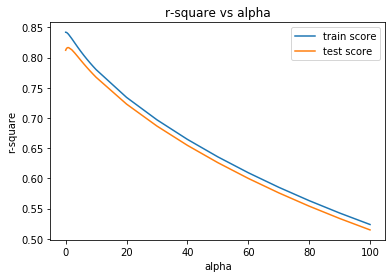

In [147]:
cv_results_100 = cv_results[cv_results.param_alpha <=100]

plt.plot(cv_results_100.param_alpha, cv_results_100.mean_train_score)
plt.plot(cv_results_100.param_alpha, cv_results_100.mean_test_score)
plt.xlabel('alpha')
plt.ylabel('r-square')
plt.title('r-square vs alpha')
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

As alpha increases the complexity decreases and bias increases. Thus r-square decreases. The optimum alpha is around 0.8

#### Find out the coef for optimum alpha

In [148]:
alpha=0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)
print(ridge.intercept_)

[-0.0602081   0.08064657  0.04411832  0.03507268  0.06646409  0.11901977
  0.05511706  0.04227113  0.05489599  0.04336032 -0.0893264  -0.05037785
 -0.03598243 -0.0762951  -0.04703579 -0.08323614 -0.06185069 -0.05388549
 -0.04654788 -0.04340229 -0.03325452 -0.06903147 -0.05559086 -0.0243549
 -0.02423553  0.02685154 -0.03504915 -0.16634089  0.49823846]
0.3920844119917067


#### Find r2 for test set and compare it with that of the train

In [149]:
y_train_pred = ridge.predict(X_train)
r2_train = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = ridge.predict(X_test)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print("train r2 score:", r2_train)
print("test r2 score:", r2_test)

train r2 score: 0.84
test r2 score: 0.8


The model generalises well as test r2 is only 4 less than that of the train set

#### Equation Ridge

In [150]:
ridge_eq = []
for index, param in enumerate(X_train.columns):
     ridge_eq.append(str(round(ridge.coef_[index], 2)) + " x " + param)
        
" + ".join(ridge_eq)

'-0.06 x MSSubClass + 0.08 x LotArea + 0.04 x BsmtFinType1 + 0.04 x BsmtFullBath + 0.07 x Fireplaces + 0.12 x GarageCars + 0.06 x WoodDeckSF + 0.04 x EnclosedPorch + 0.05 x 3SsnPorch + 0.04 x ScreenPorch + -0.09 x PoolArea + -0.05 x LotShape__IR3 + -0.04 x Neighborhood__CollgCr + -0.08 x Neighborhood__Edwards + -0.05 x Neighborhood__Gilbert + -0.08 x Neighborhood__IDOTRR + -0.06 x Neighborhood__Mitchel + -0.05 x Neighborhood__NAmes + -0.05 x Neighborhood__NWAmes + -0.04 x Neighborhood__OldTown + -0.03 x Neighborhood__Other + -0.07 x Neighborhood__Sawyer + -0.06 x Neighborhood__SawyerW + -0.02 x Neighborhood__Timber + -0.02 x Exterior1st__Other + 0.03 x BsmtExposure__Gd + -0.04 x GarageType__Other + -0.17 x Age + 0.5 x GrLivArea'

### Lasso regression

#### Declare hyper parameters range

In [151]:
params_lasso = [{'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000 ]}]

#### Train model using ridge regularisation

In [152]:
lasso = Lasso()

# We will do 5-fold cross validation
folds = 5

# Use grid search to tune the hyperparams
gridsearch_lasso = GridSearchCV(estimator=lasso, 
                                param_grid=params_lasso, 
                                scoring='r2', 
                                cv=folds, 
                                return_train_score=True, 
                                verbose=1)

# Fit on the train set
gridsearch_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05,
                                    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                    10.0, 20, 30, 40, 50, 60, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

#### Plot r2 for train and test to find optimum value of alpha

In [153]:
# Generate cv_results_l dataframe
cv_results_l = pd.DataFrame(gridsearch_lasso.cv_results_)
cv_results_l.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003860,0.000370,0.002125,0.000131,1e-06,{'alpha': 1e-06},0.832774,0.738391,7.588079e-01,0.855265,...,0.812128,0.053982,3,0.838027,0.853299,0.857341,0.835142,0.825439,0.841850,0.011832
1,0.003365,0.000088,0.002011,0.000104,1e-05,{'alpha': 1e-05},0.833430,0.740937,7.593947e-01,0.855397,...,0.812698,0.052995,2,0.838009,0.853284,0.857325,0.835125,0.825421,0.841833,0.011833
2,0.003284,0.000123,0.002140,0.000088,0.0001,{'alpha': 0.0001},0.837099,0.750600,7.640623e-01,0.854812,...,0.815203,0.048537,1,0.836217,0.851991,0.855717,0.833472,0.824185,0.840317,0.011810
3,0.003163,0.000062,0.002035,0.000056,0.001,{'alpha': 0.001},0.814620,0.743175,7.419008e-01,0.807081,...,0.785771,0.035619,4,0.791171,0.810104,0.806089,0.790596,0.781164,0.795825,0.010707
4,0.003213,0.000364,0.002118,0.000034,0.01,{'alpha': 0.01},0.389211,0.351584,3.558309e-01,0.384861,...,0.364589,0.018963,5,0.369301,0.372610,0.387607,0.380563,0.341320,0.370280,0.015818
5,0.003256,0.000174,0.002139,0.000159,0.05,{'alpha': 0.05},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.003078,0.000083,0.001968,0.000197,0.1,{'alpha': 0.1},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.003018,0.000094,0.002043,0.000077,0.2,{'alpha': 0.2},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.003092,0.000081,0.002106,0.000007,0.3,{'alpha': 0.3},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.003113,0.000073,0.002064,0.000054,0.4,{'alpha': 0.4},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


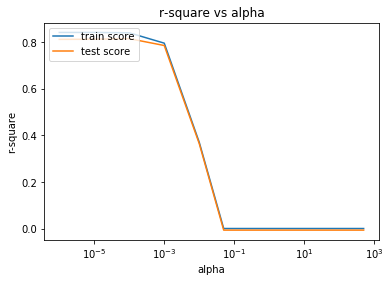

In [154]:
cv_results_l_500 = cv_results_l[cv_results_l.param_alpha <=500]

plt.plot(cv_results_l_500.param_alpha, cv_results_l_500.mean_train_score)
plt.plot(cv_results_l_500.param_alpha, cv_results_l_500.mean_test_score)
plt.xlabel('alpha')
plt.ylabel('r-square')
plt.title('r-square vs alpha')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

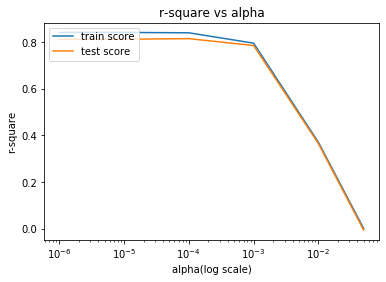

In [155]:
cv_results_l_0_05 = cv_results_l[cv_results_l.param_alpha <=0.05]

plt.plot(cv_results_l_0_05.param_alpha, cv_results_l_0_05.mean_train_score)
plt.plot(cv_results_l_0_05.param_alpha, cv_results_l_0_05.mean_test_score)
plt.xlabel('alpha(log scale)')
plt.ylabel('r-square')
plt.title('r-square vs alpha')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

The optimum value of alpha is 0.0001

#### Find out the coef for optimum alpha

In [156]:
alpha= 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)
print(lasso.intercept_)

[-0.06212977  0.04050562  0.04519624  0.0349318   0.06148169  0.11312759
  0.04779633  0.03265339  0.03832343  0.03739922 -0.09488801 -0.04237103
 -0.03079252 -0.07122834 -0.04207897 -0.07505812 -0.05380307 -0.04741171
 -0.04121392 -0.03764204 -0.02652756 -0.06163535 -0.05032365 -0.01452636
 -0.02289708  0.02640863 -0.03179413 -0.16771406  0.5504957 ]
0.38323453447440875


#### Find r2 for test set and compare it with that of the train

In [157]:
y_train_pred = lasso.predict(X_train)
r2_train = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = lasso.predict(X_test)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print("train r2 score:", r2_train)
print("test r2 score:", r2_test)

train r2 score: 0.84
test r2 score: 0.8


The model generalises well as test r2 is close to that of train

#### Equation Lasso

In [158]:
lasso_eq = []
for index, param in enumerate(X_train.columns):
     lasso_eq.append(str(round(lasso.coef_[index], 2)) + " x " + param)
        
" + ".join(lasso_eq)

'-0.06 x MSSubClass + 0.04 x LotArea + 0.05 x BsmtFinType1 + 0.03 x BsmtFullBath + 0.06 x Fireplaces + 0.11 x GarageCars + 0.05 x WoodDeckSF + 0.03 x EnclosedPorch + 0.04 x 3SsnPorch + 0.04 x ScreenPorch + -0.09 x PoolArea + -0.04 x LotShape__IR3 + -0.03 x Neighborhood__CollgCr + -0.07 x Neighborhood__Edwards + -0.04 x Neighborhood__Gilbert + -0.08 x Neighborhood__IDOTRR + -0.05 x Neighborhood__Mitchel + -0.05 x Neighborhood__NAmes + -0.04 x Neighborhood__NWAmes + -0.04 x Neighborhood__OldTown + -0.03 x Neighborhood__Other + -0.06 x Neighborhood__Sawyer + -0.05 x Neighborhood__SawyerW + -0.01 x Neighborhood__Timber + -0.02 x Exterior1st__Other + 0.03 x BsmtExposure__Gd + -0.03 x GarageType__Other + -0.17 x Age + 0.55 x GrLivArea'

# Conclusion
- Optimal value of alpha for ridge is 0.8 and for lasso is 0.0001
- The parameters `GrLivArea`, `Age`, `GarageCars`, `PoolArea`, `Neighborhood__IDOTRR` are significant in predicting the price of the house
- In particular `GrLivArea`, `Age` are the most significant variables.
- As `GrLivArea` increases, sale price increases as it has a positive coefficient.
- As `Age` increases, sale price decreases as it has a negative coefficientg
- The r-squared for both Lasso and Regression on test data set is 0.8 which is close to the train set values
- Equation Ridge Model:
    - -0.06 x MSSubClass + 0.08 x LotArea + 0.04 x BsmtFinType1 + 0.04 x BsmtFullBath + 0.07 x Fireplaces + 0.12 x GarageCars + 0.06 x WoodDeckSF + 0.04 x EnclosedPorch + 0.05 x 3SsnPorch + 0.04 x ScreenPorch + -0.09 x PoolArea + -0.05 x LotShape__IR3 + -0.04 x Neighborhood__CollgCr + -0.08 x Neighborhood__Edwards + -0.05 x Neighborhood__Gilbert + -0.08 x Neighborhood__IDOTRR + -0.06 x Neighborhood__Mitchel + -0.05 x Neighborhood__NAmes + -0.05 x Neighborhood__NWAmes + -0.04 x Neighborhood__OldTown + -0.03 x Neighborhood__Other + -0.07 x Neighborhood__Sawyer + -0.06 x Neighborhood__SawyerW + -0.02 x Neighborhood__Timber + -0.02 x Exterior1st__Other + 0.03 x BsmtExposure__Gd + -0.04 x GarageType__Other + -0.17 x Age + 0.5 x GrLivArea
- Equation Lasso Model:
    - -0.06 x MSSubClass + 0.04 x LotArea + 0.05 x BsmtFinType1 + 0.03 x BsmtFullBath + 0.06 x Fireplaces + 0.11 x GarageCars + 0.05 x WoodDeckSF + 0.03 x EnclosedPorch + 0.04 x 3SsnPorch + 0.04 x ScreenPorch + -0.09 x PoolArea + -0.04 x LotShape__IR3 + -0.03 x Neighborhood__CollgCr + -0.07 x Neighborhood__Edwards + -0.04 x Neighborhood__Gilbert + -0.08 x Neighborhood__IDOTRR + -0.05 x Neighborhood__Mitchel + -0.05 x Neighborhood__NAmes + -0.04 x Neighborhood__NWAmes + -0.04 x Neighborhood__OldTown + -0.03 x Neighborhood__Other + -0.06 x Neighborhood__Sawyer + -0.05 x Neighborhood__SawyerW + -0.01 x Neighborhood__Timber + -0.02 x Exterior1st__Other + 0.03 x BsmtExposure__Gd + -0.03 x GarageType__Other + -0.17 x Age + 0.55 x GrLivArea

# Part 2: Questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- Optimal value of alpha for ridge is 0.8 and for lasso is 0.0001
- Double the value of alpha for ridge is 1.6 and for lasso is 0.0002.
- For ridge the value of some coefficients goes increases, while value of some coefficents decreases.
- For lasso the value of LotArea was reduced to 0.
- After change the most important predictor variable for ridge is GrLivArea.
- After change the most important predictor variable for lasso is GrLivArea.


#### Ridge

In [159]:
alpha=0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)
print(ridge.intercept_)

y_train_pred = ridge.predict(X_train)
r2_train = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = ridge.predict(X_test)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print("train r2 score:", r2_train)
print("test r2 score:", r2_test)

ridge_coef_1 = ridge.coef_

[-0.0602081   0.08064657  0.04411832  0.03507268  0.06646409  0.11901977
  0.05511706  0.04227113  0.05489599  0.04336032 -0.0893264  -0.05037785
 -0.03598243 -0.0762951  -0.04703579 -0.08323614 -0.06185069 -0.05388549
 -0.04654788 -0.04340229 -0.03325452 -0.06903147 -0.05559086 -0.0243549
 -0.02423553  0.02685154 -0.03504915 -0.16634089  0.49823846]
0.3920844119917067
train r2 score: 0.84
test r2 score: 0.8


In [160]:
# Doubling alpha for ridge
alpha=1.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)
print(ridge.intercept_)

y_train_pred = ridge.predict(X_train)
r2_train = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = ridge.predict(X_test)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print("train r2 score:", r2_train)
print("test r2 score:", r2_test)

ridge_coef_2 = ridge.coef_

[-0.05749845  0.06583595  0.04406203  0.03310441  0.07363074  0.12681244
  0.05752639  0.03842357  0.04806613  0.04192205 -0.06273175 -0.04439185
 -0.03417121 -0.07451913 -0.04491258 -0.0820588  -0.06041125 -0.05380448
 -0.04413234 -0.04309034 -0.03284131 -0.0681104  -0.05258688 -0.02047083
 -0.02423147  0.02773143 -0.03453495 -0.16112303  0.45316187]
0.39424659925306127
train r2 score: 0.83
test r2 score: 0.8


In [161]:
positive_coeff = max(ridge_coef_2)
negative_coeff = min(ridge_coef_2)

positive_abs_coeff = abs(positive_coeff)
negative_abs_coeff = abs(negative_coeff)

print(positive_abs_coeff)

print(negative_abs_coeff)

index = np.where(ridge_coef_2 == positive_coeff)[0][0]

print(X_train.columns[index])


0.45316187328322277
0.1611230303600281
GrLivArea


#### Lasso

In [162]:
alpha= 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)
print(lasso.intercept_)

y_train_pred = lasso.predict(X_train)
r2_train = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = lasso.predict(X_test)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print("train r2 score:", r2_train)
print("test r2 score:", r2_test)

lasso_coef_1 = lasso.coef_

[-0.06212977  0.04050562  0.04519624  0.0349318   0.06148169  0.11312759
  0.04779633  0.03265339  0.03832343  0.03739922 -0.09488801 -0.04237103
 -0.03079252 -0.07122834 -0.04207897 -0.07505812 -0.05380307 -0.04741171
 -0.04121392 -0.03764204 -0.02652756 -0.06163535 -0.05032365 -0.01452636
 -0.02289708  0.02640863 -0.03179413 -0.16771406  0.5504957 ]
0.38323453447440875
train r2 score: 0.84
test r2 score: 0.8


In [163]:
alpha= 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)
print(lasso.intercept_)

y_train_pred = lasso.predict(X_train)
r2_train = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = lasso.predict(X_test)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print("train r2 score:", r2_train)
print("test r2 score:", r2_test)

lasso_coef_2 = lasso.coef_

[-0.06036408  0.          0.04618926  0.03136944  0.06523854  0.11806129
  0.04354358  0.0182689   0.01238679  0.03025982 -0.05368879 -0.02998406
 -0.02387628 -0.06443813 -0.03493645 -0.06606937 -0.04486137 -0.04132825
 -0.03373724 -0.03163436 -0.01973671 -0.05387659 -0.04178156 -0.00129115
 -0.02181727  0.02656773 -0.02806334 -0.16315535  0.54257655]
0.3773828496304084
train r2 score: 0.83
test r2 score: 0.8


In [164]:
positive_coeff = max(lasso_coef_2)
negative_coeff = min(lasso_coef_2)

positive_abs_coeff = abs(positive_coeff)
negative_abs_coeff = abs(negative_coeff)

print(positive_abs_coeff)

print(negative_abs_coeff)

index = np.where(lasso_coef_2 == positive_coeff)[0][0]

print(X_train.columns[index])

print(X_train.columns[1])

0.5425765490116493
0.16315534694140676
GrLivArea
LotArea


Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?
- Lasso works well on small number of significant parameters. While ridge works well on many parameters with equal weightage. Since we have small number of parameters i.e. 29  and some coefficients are significant compared to others, I will choose to go with Lasso.



In [165]:
ridge_coef_1

array([-0.0602081 ,  0.08064657,  0.04411832,  0.03507268,  0.06646409,
        0.11901977,  0.05511706,  0.04227113,  0.05489599,  0.04336032,
       -0.0893264 , -0.05037785, -0.03598243, -0.0762951 , -0.04703579,
       -0.08323614, -0.06185069, -0.05388549, -0.04654788, -0.04340229,
       -0.03325452, -0.06903147, -0.05559086, -0.0243549 , -0.02423553,
        0.02685154, -0.03504915, -0.16634089,  0.49823846])

In [166]:
lasso_coef_1

array([-0.06212977,  0.04050562,  0.04519624,  0.0349318 ,  0.06148169,
        0.11312759,  0.04779633,  0.03265339,  0.03832343,  0.03739922,
       -0.09488801, -0.04237103, -0.03079252, -0.07122834, -0.04207897,
       -0.07505812, -0.05380307, -0.04741171, -0.04121392, -0.03764204,
       -0.02652756, -0.06163535, -0.05032365, -0.01452636, -0.02289708,
        0.02640863, -0.03179413, -0.16771406,  0.5504957 ])

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

- ['Fireplaces',
 'WoodDeckSF',
 'LotArea',
 'Neighborhood__Edwards',
 'Neighborhood__Sawyer']

In [167]:
lasso_coef_1

array([-0.06212977,  0.04050562,  0.04519624,  0.0349318 ,  0.06148169,
        0.11312759,  0.04779633,  0.03265339,  0.03832343,  0.03739922,
       -0.09488801, -0.04237103, -0.03079252, -0.07122834, -0.04207897,
       -0.07505812, -0.05380307, -0.04741171, -0.04121392, -0.03764204,
       -0.02652756, -0.06163535, -0.05032365, -0.01452636, -0.02289708,
        0.02640863, -0.03179413, -0.16771406,  0.5504957 ])

In [168]:
top_5_coeff_vals = [0.5504957, -0.16771406, 0.11312759, -0.09488801, -0.07505812]
print(len(lasso_coef_1))

top_5_cols = []
for x in [28, 27, 5, 10, 15]:
    top_5_cols.append(X_train.columns[x])

top_5_cols

29


['GrLivArea', 'Age', 'GarageCars', 'PoolArea', 'Neighborhood__IDOTRR']

In [169]:
X_train_Q = X_train.drop(columns=top_5_cols)
X_test_Q = X_test.drop(columns=top_5_cols)

print(X_train_Q.shape)
print(X_test_Q.shape)

(1021, 24)
(439, 24)


In [170]:
lasso = Lasso()

# We will do 5-fold cross validation
folds = 5

# Use grid search to tune the hyperparams
gridsearch_lasso = GridSearchCV(estimator=lasso, 
                                param_grid=params_lasso, 
                                scoring='r2', 
                                cv=folds, 
                                return_train_score=True, 
                                verbose=1)

# Fit on the train set
gridsearch_lasso.fit(X_train_Q, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05,
                                    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                    10.0, 20, 30, 40, 50, 60, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [171]:
# Generate cv_results_l dataframe
cv_results_l = pd.DataFrame(gridsearch_lasso.cv_results_)
cv_results_l.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003968,0.000384,0.002204,0.000148,1e-06,{'alpha': 1e-06},0.563979,0.450368,4.524496e-01,0.522012,...,0.509074,0.049173,3,0.525821,0.551540,0.553206,0.534840,0.523476,0.537776,0.012518
1,0.003518,0.000263,0.002027,0.000051,1e-05,{'alpha': 1e-05},0.564202,0.450849,4.527404e-01,0.522240,...,0.509311,0.049046,2,0.525808,0.551527,0.553195,0.534826,0.523465,0.537764,0.012519
2,0.003393,0.000145,0.002067,0.000058,0.0001,{'alpha': 0.0001},0.563186,0.455212,4.548078e-01,0.522260,...,0.510048,0.046972,1,0.524660,0.550507,0.552157,0.533578,0.522323,0.536645,0.012577
3,0.003156,0.000131,0.002069,0.000065,0.001,{'alpha': 0.001},0.528466,0.454677,4.373619e-01,0.486569,...,0.483661,0.033940,4,0.491169,0.511857,0.512622,0.500268,0.485566,0.500297,0.010825
4,0.003378,0.000093,0.002251,0.000128,0.01,{'alpha': 0.01},0.176236,0.162028,1.603832e-01,0.166085,...,0.162598,0.009044,5,0.162424,0.170966,0.178378,0.183534,0.147714,0.168603,0.012638
5,0.003215,0.000229,0.002181,0.000139,0.05,{'alpha': 0.05},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.003002,0.000091,0.002022,0.000050,0.1,{'alpha': 0.1},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.002938,0.000067,0.001934,0.000114,0.2,{'alpha': 0.2},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.002904,0.000136,0.001992,0.000051,0.3,{'alpha': 0.3},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.002897,0.000227,0.001888,0.000139,0.4,{'alpha': 0.4},-0.008156,-0.008018,-1.846927e-08,-0.009789,...,-0.006874,0.003494,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [172]:
alpha= 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_Q, y_train)
print(lasso.coef_)
print(lasso.intercept_)

y_train_pred = lasso.predict(X_train_Q)
r2_train = round(r2_score(y_train, y_train_pred), 2)

y_test_pred = lasso.predict(X_test_Q)
r2_test = round(r2_score(y_test, y_test_pred), 2)

print("train r2 score:", r2_train)
print("test r2 score:", r2_test)

lasso_coef_1 = lasso.coef_

[-0.02909163  0.13527734  0.07222652  0.01660871  0.19843262  0.15118817
 -0.04037757  0.07998256  0.05304658 -0.01905669 -0.01389308 -0.11304113
 -0.02121289 -0.07163816 -0.09556972 -0.04302803 -0.09694285 -0.07055701
 -0.10631745 -0.03401895  0.00749858 -0.03480383  0.03969709 -0.05651139]
0.4535373221353578
train r2 score: 0.53
test r2 score: 0.45


In [173]:
top_5_cols2 = []
for x in [4, 5, 1, 11, 18]:
    top_5_cols2.append(X_train_Q.columns[x])

top_5_cols2

['Fireplaces',
 'WoodDeckSF',
 'LotArea',
 'Neighborhood__Edwards',
 'Neighborhood__Sawyer']

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?
- We can make sure that a model is robust and generalisable by deliberately making the model simple but not naive. This is a tradeoff as simpler models have high bias and low variance and comple models have high variance and low bias. Making a model too simple will make it have a very high bias and it will underfit. Making a model too complex will make it have hight variance and thus it will overfit the training data and fail on test. Thus we need a model with low biad and low variance which are a tradeoff. Thus we need to balance these by picking optimally complex model. Regularisation is one way to reduce complexity of a model. The total error is the sum of variance and bias for a model. The goal should be to minimise the total error, which will give us an optimally comple model.